#Real estate market research (apartments)

We have at our disposal data from the Yandex.Real Estate service - an archive of advertisements for the sale of apartments in St. Petersburg and neighboring settlements for several years. It is necessary to determine the market value of real estate. The task is to set parameters. This will allow you to build an automated system: it will track anomalies and fraudulent activity.

For each apartment for sale, two types of data are available. The first ones are entered by the user, the second ones are obtained automatically based on cartographic data. For example, the distance to the center, airport, nearest park and pond.

### Open the data file and examine the general information.

**Open the file and output its first 5 lines and specify the option to display all columns of the dataframe.**
<a id='item1_1'></a>[Go to section 2](#item2_1)

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
df = pd.read_csv('/content/drive/My Drive/projects/real_estate_market_analysis/real_estate_data.csv',  sep='\t')
pd.set_option('display.max_columns', None)
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


**We will display general information about the dataframe.**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

The name of the column `cityCenters_nearest` contains a capital letter; later we will change the name of this column in the data preprocessing section for convenience.

**Add a description of the data right here:**

- **`airports_nearest`** — distance to the nearest airport in meters (m)
- **`balcony`** — number of balconies
- **`ceiling_height`** — ceiling height (m)
- **`cityCenters_nearest`** — distance to the city center (m)
- **`days_exposition`** — how many days the ad was posted (from publication to removal)
- **`first_day_exposition`** — date of publication
- **`floor`** - floor
- **`floors_total`** — total floors in the house
- **`is_apartment`** — apartments (boolean type)
- **`kitchen_area`** — kitchen area in square meters (m²)
- **`last_price`** — price at the time of removal from publication
- **`living_area`** — living area in square meters (m²)
- **`locality_name`** — name of the locality
- **`open_plan`** - open plan (boolean type)
- **`parks_around3000`** — number of parks within a radius of 3 km
- **`parks_nearest`** — distance to the nearest park (m)
- **`ponds_around3000`** — the number of bodies of water within a radius of 3 km
- **`ponds_nearest`** — distance to the nearest body of water (m)
- **`rooms`** — number of rooms
- **`studio`** — studio apartment (boolean type)
- **`total_area`** — total area of the apartment in square meters (m²)
- **`total_images`** — number of photos of the apartment in the ad

Numeric data as described is in all columns, except: **`first_day_exposition`** - *datetime*, **`is_apartment`** - *bool*, **`locality_name`** - *str*, **` open_plan`** - *bool*, **`studio`** - *bool*.

However, based on the dataframe information, there are discrepancies in the data types. We will carry out this processing in the data preprocessing section.

You can also see a large number of gaps in the data, especially in the **`is_apartment`** variable.

**Let's get additional information about the dataframe using the `describe()` method.**

In [8]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


It can be seen that there are questions about the data in many columns. For example, the minimum value for a ceiling is 1 meter - which is very strange for an apartment. Or the following values: number of rooms 0, living area 2 sq. m. meters, distance to the airport is 0 meters. Or the maximum values for a ceiling height of 100 meters, the ad placement time of 1580 days - all this will need to be further checked in the data preprocessing section.

**Let's build a histogram for the numeric variables of a dataframe with the number of buckets 12 and size 15 x 20.**

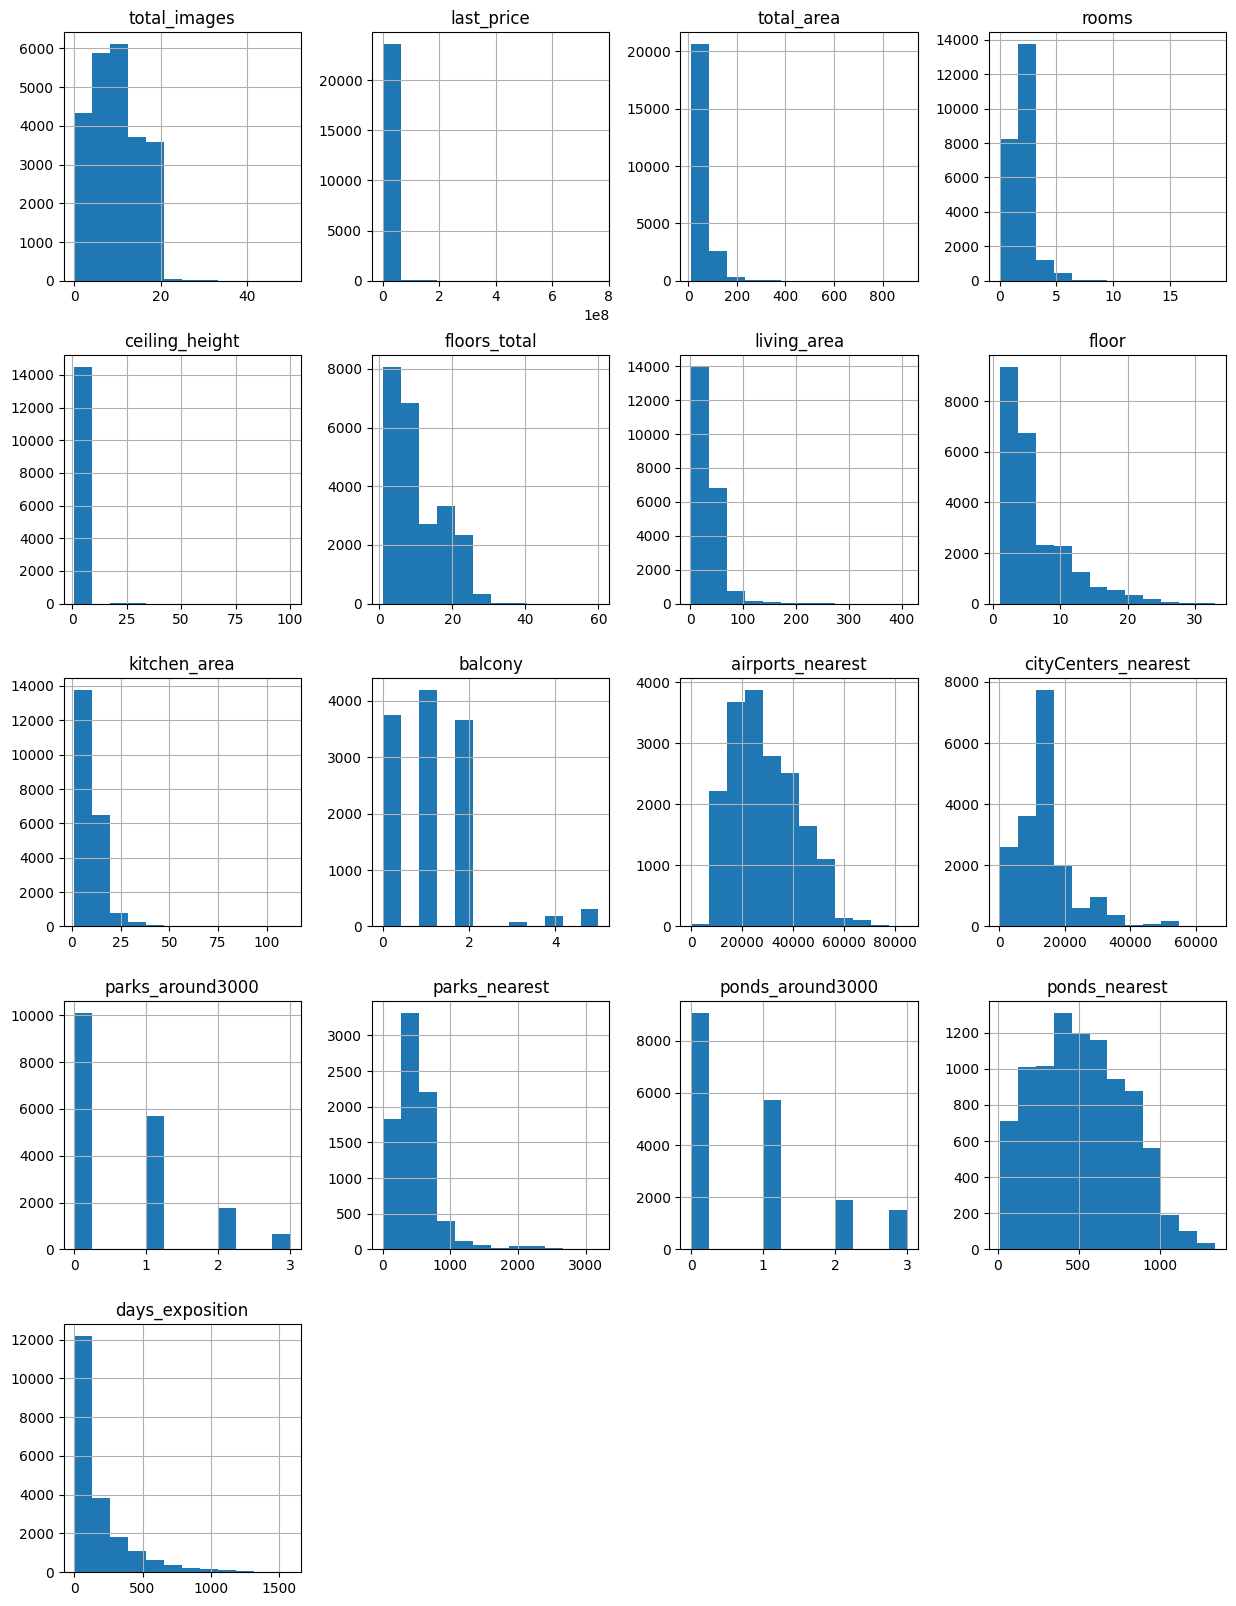

In [9]:
df.hist(bins=12, figsize=(15, 20));

You can see that many histograms have a peak at value 0, which may be due to anomalies in the data.

**Let's check the dataframe for obvious duplicates.**

In [10]:
df.duplicated().sum()

0

**There are no duplicate rows in the dataframe.**

**It is clear that there are questions about the data in many columns. Many histograms have the highest peak at zero; it is necessary to understand in detail the reasons for such histograms in the second section. The name of the column `cityCenters_nearest` will need to be converted to the correct case, and the types of some columns in the dataframe will also need to be adjusted, they do not match the nature of the data in them.**

### Data preprocessing

**2.1 Finding and examining missing values.**

**Let's find and calculate the proportion of gaps in the data of each of the dataframe columns using the `isna()` and `mean()` methods.**

In [11]:
df.isna().mean()

total_images            0.000000
last_price              0.000000
total_area              0.000000
first_day_exposition    0.000000
rooms                   0.000000
ceiling_height          0.387991
floors_total            0.003629
living_area             0.080299
floor                   0.000000
is_apartment            0.882906
studio                  0.000000
open_plan               0.000000
kitchen_area            0.096122
balcony                 0.486054
locality_name           0.002068
airports_nearest        0.233850
cityCenters_nearest     0.232879
parks_around3000        0.232837
parks_nearest           0.659100
ponds_around3000        0.232837
ponds_nearest           0.615596
days_exposition         0.134225
dtype: float64

A large number of missing data in the following columns:
- `ceiling_height` - 38.8%
- `is_apartment` - 88.3%
- `balcony` - 48.6%
- `airports_nearest` - 23.4%
- `cityCenters_nearest` - 23.3%
- `parks_around3000` - 23.3%
- `parks_nearest` - 65.9%
- `ponds_around3000` - 23.3%
- `ponds_nearest` - 61.6%
- `days_exposition` - 13.4%

The database contains two types of data about each apartment: user-added and cartographic, i.e. data created automatically by the service.

The first type includes the following: ceiling height, number of floors in the house, living area, whether the apartment is an apartment, kitchen area, number of balconies.

For the second - the name of the locality, the distance to the nearest airport, the distance to the city center, the number of parks within a radius of 3 km, the distance to the nearest park, the number of bodies of water within a radius of 3 km, the distance to the nearest body of water and how many days the ad was posted.

Gaps in data of the first type, i.e. that the user enters are associated with the user not completing them.
Gaps in data of the second type, i.e. that are entered by the service are associated with possible problems with data upload or generation on the server side.

**We need to analyze the dependence of price on: total area; living space; kitchen area; number of rooms; the floor on which the apartment is located (first, last, other); posting dates (day of week, month, year). Therefore, we will not completely delete all lines with gaps, because lines with gaps may contain useful information for us to analyze the dependence of price on one of the listed indicators. You can only delete rows that have gaps in all of the listed columns.**

We indicate below for each of the columns possible options for filling in the blanks.


- `ceiling_height` - we use the median values for the same locality, because height may not be filled where it is not a feature.
- `floors_total` - because There are only 0.36% gaps and this is one of the key parameters for analysis, then there is no point in filling these gaps with some values, let’s filter this data.
- `living_area` - because There are only 8% gaps and this is one of the key parameters for analysis, then we will fill them with the value -1 so as not to lose other data useful for analysis in these lines.
- `is_apartment` - probably the blank means that the apartment is not an apartment, fill in the blanks with False.
- `kitchen_area` - because There are only 9.6% gaps and this is one of the key parameters for analysis, then we will fill them with the value -1 so as not to lose other data useful for analysis in these lines.
- `balcony` - probably the blank means there is no balcony, fill the gaps with the value 0.
- `locality_name` - the gaps in this variable cannot be filled with something adequate and they are only 0.2% of all data, so we will filter these lines.
- `airports_nearest` - the dependence of the price on this parameter is not studied in step 3, so you can fill in the gaps with the value -1.
- `cityCenters_nearest` - the dependence of price on this parameter is not studied in step 3, so you can fill in the gaps with the value -1.
- `parks_around3000` - probably the omission means there are no parks nearby, fill it with the value 0.
- `parks_nearest` - probably the blank means there are no parks nearby, fill it with the value -1, which will mean “far away”.
- `ponds_around3000` - probably the omission means there is no pond nearby, fill it with the value 0.
- `ponds_nearest` - probably the omission means there is no pond nearby, fill it with the value -1, which will mean “far away”.
- `days_exposition` - the gap may be due to the fact that the ad has not yet been removed at the time of uploading; replace the gap with the number of days from the date of publication to the latest date of removal of the ad.

**Let's check if there are any rows in the dataframe where all the values we are interested in are missing at once.**

In [12]:
df.query('first_day_exposition.isna() & floor.isna() \
          & floors_total.isna() & kitchen_area.isna() \
          & last_price.isna() & living_area.isna() \
          & rooms.isna() & total_area.isna()')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


**There are no such lines, so we will fill the gaps with some characteristic value, but not delete these lines.**

**We will create a column `id`, to which we will assign the initial indexes of all the original rows of the dataframe for future comparisons and research.**

In [13]:
df['id'] = df.index

**Fill in the blanks in the `locality_name` column with the value '`unknown Unknown'`.** [Go to top](#item1_1) <a id='item2_1'></a>

In [14]:
df['locality_name'] = df['locality_name'].fillna('unknown Unknown')
df['locality_name'].isna().sum()

0

**Fill in the blanks in the `floors_total` column with the value -1. Let’s first check how many lines correspond to the first floor and have gaps in the data on the number of floors in the house, because in this case it could be a private one-story house.**

In [15]:
df[(df['floors_total'].isna()) & (df['floor'] == 1)]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,id
237,4,2438033.0,28.10,2016-11-23T00:00:00,1,NaN,NaN,20.75,1,NaN,False,False,NaN,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,251.0,237
3817,1,1640000.0,23.98,2015-08-25T00:00:00,1,NaN,NaN,NaN,1,NaN,False,False,NaN,0.0,посёлок Щеглово,61908.0,34085.0,0.0,NaN,0.0,NaN,378.0,3817
15989,1,4100000.0,74.50,2017-04-22T00:00:00,3,NaN,NaN,NaN,1,NaN,False,False,NaN,0.0,Красное Село,25382.0,28806.0,0.0,NaN,0.0,NaN,72.0,15989


**We see that the phenomenon is not widespread, so we fill in all the gaps in the data on the number of floors with the value -1.**

In [16]:
df['floors_total'] = df['floors_total'].fillna(-1)
df['floors_total'].isna().sum()

0

**Fill in the blanks in the `living_area` column with the value -1.**

In [17]:
df['living_area'] = df['living_area'].fillna(-1)
df['living_area'].isna().sum()

0

**Fill in the blanks in the `is_apartment` column with False.**

In [18]:
df['is_apartment'] = df['is_apartment'].fillna(False)
df['is_apartment'].isna().sum()

0

**Fill in the blanks in the `kitchen_area` column with the value -1.**

In [19]:
df['kitchen_area'] = df['kitchen_area'].fillna(-1)
df['kitchen_area'].isna().sum()

0

**Let's fill in the blanks in the `balcony` column with the value 0, because Most likely, if the user did not enter any value, this means that he does not have a balcony.**

In [20]:
df['balcony'] = df['balcony'].fillna(0)
df['balcony'].isna().sum()

0

**Fill in the blanks in the `airports_nearest`, `cityCenters_nearest`, `parks_nearest`, `ponds_nearest` columns with the value -1.**

In [21]:
df['airports_nearest'] = df['airports_nearest'].fillna(-1)
display(df['kitchen_area'].isna().sum())
df['cityCenters_nearest'] = df['cityCenters_nearest'].fillna(-1)
display(df['cityCenters_nearest'].isna().sum())
df['parks_nearest'] = df['parks_nearest'].fillna(-1)
display(df['parks_nearest'].isna().sum())
df['ponds_nearest'] = df['ponds_nearest'].fillna(-1)
df['ponds_nearest'].isna().sum()

0

0

0

0

**Let's fill the gaps in the columns `parks_around3000`, `ponds_around3000` with the value 0, similar to the gap hypothesis with the number of balconies.**

In [22]:
df['parks_around3000'] = df['parks_around3000'].fillna(0)
display(df['parks_around3000'].isna().sum())
df['ponds_around3000'] = df['ponds_around3000'].fillna(0)
df['ponds_around3000'].isna().sum()

0

0

**Rename the column `cityCenters_nearest` in accordance with the "snake" standard to `city_centers_nearest` using the `rename()` method and check the changes using the `info()` method.**

In [23]:
df.rename(columns={"cityCenters_nearest": "city_centers_nearest"}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23699 non-null  float64
 7   living_area           23699 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          23699 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23699 non-null  object 
 15  airports_nearest   

**2.3 Let's now check for implicit duplicates in the `locality_name` column.**

In [24]:
df['locality_name'].value_counts().reset_index().sort_values(by='index')['index'].unique()

array(['unknown Unknown', 'Бокситогорск', 'Волосово', 'Волхов',
       'Всеволожск', 'Выборг', 'Высоцк', 'Гатчина', 'Зеленогорск',
       'Ивангород', 'Каменногорск', 'Кингисепп', 'Кириши', 'Кировск',
       'Колпино', 'Коммунар', 'Красное Село', 'Кронштадт', 'Кудрово',
       'Лодейное Поле', 'Ломоносов', 'Луга', 'Любань', 'Мурино',
       'Никольское', 'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф',
       'Пикалёво', 'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин',
       'Санкт-Петербург', 'Светогорск', 'Сертолово', 'Сестрорецк',
       'Сланцы', 'Сосновый Бор', 'Сясьстрой', 'Тихвин', 'Тосно',
       'Шлиссельбург', 'городской поселок Большая Ижора',
       'городской поселок Янино-1', 'городской посёлок Будогощь',
       'городской посёлок Виллози', 'городской посёлок Лесогорский',
       'городской посёлок Мга', 'городской посёлок Назия',
       'городской посёлок Новоселье', 'городской посёлок Павлово',
       'городской посёлок Рощино', 'городской посёлок Свирьстрой',
     

**We see that a large number of settlements have the conditional prefix `'поселок'` \ `'поселок городского типа'` (`'village'` \``urban-type settlement'`), etc. Let's create an additional column in the dataframe called `locality_type`, where we will enter the type of settlement, as well as the `locality` column, where we will enter only the name without the type, to make it easier to filter out implicit duplicates and bring them to a single standard.**

**To do this, we will create two functions, each of which identifies the type of settlement and its name. Let's apply these functions and create two new columns in the dataframe from these values - with the name of the settlement and its type.**

In [25]:
def locality_core(x):
  spisok = x.split()
  y = 0
  new_spisok = []
  for element in spisok:
    if element[0].isupper():
      y += 1
      new_spisok.append(element)
  if y != 0:
    return ' '.join(new_spisok)
  else:
    return 'unknown'

def locality_type(x):
  spisok = x.split()
  y = 0
  new_spisok = []
  for element in spisok:
    if not element[0].isupper():
      y += 1
      new_spisok.append(element)
  if y != 0:
    return ' '.join(new_spisok)
  else:
    return 'город'

df['locality'] = df['locality_name'].apply(locality_core)
df['locality_type'] = df['locality_name'].apply(locality_type)
df

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,id,locality,locality_type
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,False,False,False,25.00,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,0,Санкт-Петербург,город
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,False,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,-1.0,0.0,-1.0,81.0,1,Шушары,посёлок
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,False,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,2,Санкт-Петербург,город
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,-1.0,9,False,False,False,-1.00,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,3,Санкт-Петербург,город
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,False,False,False,41.00,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,4,Санкт-Петербург,город
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,False,False,False,13.83,0.0,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN,23694,Санкт-Петербург,город
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,False,False,False,8.50,0.0,Тосно,-1.0,-1.0,0.0,-1.0,0.0,-1.0,45.0,23695,Тосно,город
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,False,False,False,-1.00,0.0,село Рождествено,-1.0,-1.0,0.0,-1.0,0.0,-1.0,NaN,23696,Рождествено,село
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,-1.0,12,False,False,False,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0,23697,Санкт-Петербург,город


In [26]:
df['locality_type'].value_counts().reset_index().sort_values(by='index')['index'].unique()

array(['unknown', 'город', 'городской поселок', 'городской посёлок',
       'деревня', 'коттеджный поселок', 'коттеджный посёлок', 'поселок',
       'поселок городского типа', 'поселок городского типа имени',
       'поселок станции', 'посёлок', 'посёлок 69-й километр',
       'посёлок городского типа', 'посёлок городского типа имени',
       'посёлок при железнодорожной станции', 'посёлок станции',
       'садоводческое некоммерческое товарищество',
       'садовое товарищество', 'село'], dtype=object)

**I did not identify any implicit duplicates among the names of settlements, however, among the types of settlements there are enough of them. Let's bring them to a single style, first we'll accept the spelling with the letter E.**

In [27]:
df['locality_type'] = df['locality_type'].str.replace('ё', 'е')
df['locality_type'].value_counts().reset_index().sort_values(by='index')['index'].unique()

array(['unknown', 'город', 'городской поселок', 'деревня',
       'коттеджный поселок', 'поселок', 'поселок 69-й километр',
       'поселок городского типа', 'поселок городского типа имени',
       'поселок при железнодорожной станции', 'поселок станции',
       'садоводческое некоммерческое товарищество',
       'садовое товарищество', 'село'], dtype=object)

**The number of different types of settlements has decreased, and we have made progress in identifying implicit duplicates. Let's continue.**

**Let's check which names fall into the `'поселок 69-й километр'` (`'village 69th kilometer'`) type.**

In [28]:
df[['locality_type', 'locality', 'locality_name']].query('locality_type == "поселок 69-й километр"')

,locality_type,locality,locality_name
7646,поселок 69-й километр,Платформа,посёлок Платформа 69-й километр


**Let's now check how many rows in the dataframe have the value of settlement`'Платформа'`.**

In [29]:
df[['locality_type', 'locality', 'locality_name']].query('locality == "Платформа"')

,locality_type,locality,locality_name
7646,поселок 69-й километр,Платформа,посёлок Платформа 69-й километр


**We see that this is an error in our data parsing process. Let's fix it.**

In [30]:
df['locality'] = df['locality'].replace('Платформа', 'Платформа 69-й километр')
df['locality_type'] = df['locality_type'].replace('поселок 69-й километр', 'поселок')
df.query('locality == "Платформа 69-й километр"')[['locality_type', 'locality', 'locality_name']]

,locality_type,locality,locality_name
7646,поселок,Платформа 69-й километр,посёлок Платформа 69-й километр


**Now let’s check which names fall into the `'поселок городского типа имени'` (`'urban-type settlement name'`) type.**

In [31]:
df.query('locality_type == "поселок городского типа имени"')['locality_name'].unique()

array(['поселок городского типа имени Свердлова',
       'посёлок городского типа имени Морозова',
       'посёлок городского типа имени Свердлова'], dtype=object)

**We see that this is an error in our data parsing process. Let's fix it.**

In [32]:
df['locality'] = df['locality'].replace('Свердлова', 'имени Свердлова')
df['locality'] = df['locality'].replace('Морозова', 'имени Морозова')
df['locality_type'] = df['locality_type'].replace('поселок городского типа имени', 'поселок городского типа')
df.query('locality in ["имени Свердлова","имени Свердлова"]')[['locality_type', 'locality', 'locality_name']]

,locality_type,locality,locality_name
1594,поселок городского типа,имени Свердлова,поселок городского типа имени Свердлова
2016,поселок городского типа,имени Свердлова,поселок городского типа имени Свердлова
2055,поселок городского типа,имени Свердлова,поселок городского типа имени Свердлова
2208,поселок городского типа,имени Свердлова,посёлок городского типа имени Свердлова
2388,поселок городского типа,имени Свердлова,поселок городского типа имени Свердлова
3125,поселок городского типа,имени Свердлова,посёлок городского типа имени Свердлова
4416,поселок городского типа,имени Свердлова,поселок городского типа имени Свердлова
5372,поселок городского типа,имени Свердлова,поселок городского типа имени Свердлова
8148,поселок городского типа,имени Свердлова,поселок городского типа имени Свердлова
8229,поселок городского типа,имени Свердлова,поселок городского типа имени Свердлова


**We will replace the values of the settlement types `'городской поселок'`  (`'urban settlement'`) and `'поселок городского типа'` (`'urban settlement'`) with `'ПГТ'`(`'PGT'`), thereby removing implicit duplicates.**

In [33]:
df['locality_type'] = df['locality_type'].replace(['городской поселок','поселок городского типа'], 'ПГТ')
df['locality_type'].value_counts().reset_index().sort_values(by='index')['index'].unique()

array(['unknown', 'ПГТ', 'город', 'деревня', 'коттеджный поселок',
       'поселок', 'поселок при железнодорожной станции',
       'поселок станции', 'садоводческое некоммерческое товарищество',
       'садовое товарищество', 'село'], dtype=object)

**We see that some of the values still overlap in meaning.**

**Let's see what falls into `'садовое товарищество'` (`'garden partnership'`) and `'садоводческое некоммерческое товарищество'` (`'gardening non-profit partnership'`).**

In [34]:
df.query('locality_type in ["садовое товарищество", "садоводческое некоммерческое товарищество"]')['locality_name']

101                       садовое товарищество Новая Ропша
2711                            садовое товарищество Рахья
7323     садоводческое некоммерческое товарищество Лесн...
18587                           садовое товарищество Садко
19635                    садовое товарищество Приладожский
Name: locality_name, dtype: object

**From the web search it becomes clear that all this is called СНТ (SNT). Let's rename the value for these types to `'СНТ'`(`'SNT'`).**

In [35]:
df['locality_type'] = df['locality_type'].replace(['садовое товарищество','садоводческое некоммерческое товарищество'], 'СНТ')
df['locality_type'].value_counts().reset_index().sort_values(by='index')['index'].unique()

array(['unknown', 'ПГТ', 'СНТ', 'город', 'деревня', 'коттеджный поселок',
       'поселок', 'поселок при железнодорожной станции',
       'поселок станции', 'село'], dtype=object)

**Проделаем аналогичную проверку для типов `'поселок при железнодорожной станции'` и `'поселок станции'`.**

**Let's do a similar check for the types `'поселок при железнодорожной станции'` (`'village at a railway station'`) and `'поселок станции'` (``station village'`).**

In [36]:
df.query('locality_type in ["поселок при железнодорожной станции", "поселок станции"]')['locality_name']

1625                               поселок станции Корнево
1982                                поселок станции Вещево
3249                         поселок станции Приветнинское
5300                                поселок станции Вещево
9512            посёлок при железнодорожной станции Вещево
10385                              посёлок станции Громово
11596    посёлок при железнодорожной станции Приветнинское
14911                                посёлок станции Свирь
15629                              поселок станции Лужайка
18486                        поселок станции Приветнинское
18976                                посёлок станции Свирь
19585                              посёлок станции Громово
20040                              посёлок станции Громово
22925                               поселок станции Вещево
22952                               поселок станции Вещево
Name: locality_name, dtype: object

**We see that the values intersect, an additional check in the search engine makes it clear that all of these can be called villages near the railway station, i.e. let's rename these types to `'поселок при жд станции'` /(`'village at the railway station'`).**

In [37]:
df['locality_type'] = df['locality_type']. \
replace(['поселок при железнодорожной станции','поселок станции'], 'поселок при жд станции')
df['locality_type'].value_counts().reset_index().sort_values(by='index')['index'].unique()

array(['unknown', 'ПГТ', 'СНТ', 'город', 'деревня', 'коттеджный поселок',
       'поселок', 'поселок при жд станции', 'село'], dtype=object)

**We see that now there are much fewer types of settlements, which has led to a decrease in implicit duplicates.**

**Now let’s check whether there are intersections between the remaining types of settlements for the same names of settlements.**

In [38]:
#function of searching for intersections in the names of settlements of two dataframes filtered by different types of settlements
def find_types_dupl(data, type1, type2):
     return df[df['locality_type'] == type1].merge(df[df['locality_type'] == type2], on='locality')['locality'].unique()

locality_unique_types = df['locality_type'].unique() #list of unique types of settlements

#cycle of searching through all combinations of two different types of settlements with the output of non-zero intersections
s = 0
for type1 in locality_unique_types:
     s += 1
     for type2 in range(s, len(locality_unique_types)):
         if find_types_dupl(df, type1, locality_unique_types[type2]).size > 0:
             print(f'intersection of types "{type1}" and "{locality_unique_types[type2]}" in localities:')
             print(find_types_dupl(df, type1, locality_unique_types[type2]))
             print()

intersection of types "город" and "поселок" in localities:
['Мурино' 'Любань']

intersection of types "город" and "деревня" in localities:
['Кудрово']

intersection of types "город" and "село" in localities:
['Никольское']

intersection of types "поселок" and "ПГТ" in localities:
['Рябово']

intersection of types "поселок" and "деревня" in localities:
['Зимитицы' 'Щеглово' 'Гарболово' 'Калитино' 'Рабитицы']

intersection of types "поселок" and "поселок при жд станции" in localities:
['Громово']

intersection of types "поселок" and "коттеджный поселок" in localities:
['Лесное']

intersection of types "ПГТ" and "деревня" in localities:
['Фёдоровское']

intersection of types "ПГТ" and "СНТ" in localities:
['Рахья' 'Приладожский']

intersection of types "ПГТ" and "село" in localities:
['Павлово']



**According to information from the  web search, including the Maps service:**

**`'Мурино'` was previously a village, now it is a city, let's change the type to city for this locality.**

**`'Кудрово'` - there is both a village and a city, but the village is not located in the Leningrad region, and the explanation for the task says that the settlements in the dataframe are neighboring to St. Petersburg. Let's correct the type to city.**

**`'Никольское'` - there is both a city and a village. No type changes required.**

**`'Рябово'` - there is both a town and a village. No type changes required.**

**`'Зимитицы'`, `'Щеглово'`, `'Гарболово'`, `'Калитино'`, `'Рабитицы'` - there is both a settlement and a village. No type changes required.**

**`'Громово'` - there is both a village and a village near the railway station. No type changes required.**

**`'Лесное'` - there is both a village and a cottage community. No type changes required.**

**`'Фёдоровское'` - there is both a village and an urban-type settlement, but the village is not located in the Leningrad region, and the explanation for the task says that the settlements in the dataframe are neighboring to St. Petersburg. We will correct the type on PGT.**

**`'Рахья'`, `'Приладожский'` - there are both PGT and SNT. No type changes required.**

**`'Павлово'` - there is both a town and a village. No type changes required.**

**Let's make these changes to the dataframe.**

In [39]:
df.loc[df['locality'] == 'Мурино', 'locality_type'] = 'город'
df[df['locality'] == "Мурино"]['locality_type'].unique()

array(['город'], dtype=object)

In [40]:
df.loc[df['locality'] == 'Кудрово', 'locality_type'] = 'город'
df[df['locality'] == "Кудрово"]['locality_type'].unique()

array(['город'], dtype=object)

In [41]:
df.loc[df['locality'] == 'Фёдоровское', 'locality_type'] = 'ПГТ'
df[df['locality'] == "Фёдоровское"]['locality_type'].unique()

array(['ПГТ'], dtype=object)

**Now let's merge the names of settlements with their type into a new column `'new_locality_name'`.**

In [42]:
df['new_locality_name'] = df[['locality_type', 'locality']].agg(' '.join, axis=1)
df['new_locality_name'] = df['new_locality_name'].replace('unknown Unknown', 'Unknown')
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,id,locality,locality_type,new_locality_name
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,False,False,False,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,0,Санкт-Петербург,город,город Санкт-Петербург
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,False,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,-1.0,0.0,-1.0,81.0,1,Шушары,поселок,поселок Шушары
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,False,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,2,Санкт-Петербург,город,город Санкт-Петербург
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,-1.0,9,False,False,False,-1.0,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,3,Санкт-Петербург,город,город Санкт-Петербург
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,False,False,False,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,4,Санкт-Петербург,город,город Санкт-Петербург


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23699 non-null  float64
 7   living_area           23699 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          23699 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23699 non-null  object 
 15  airports_nearest   

**Now fill in the gaps in the `ceiling_height` column using the median values of ceiling heights corresponding to a specific locality.**

In [44]:
df['ceiling_height'].fillna(df.groupby('new_locality_name')['ceiling_height'].transform('median'), inplace=True)
df['ceiling_height'].isna().sum()

100

**The number of remaining gaps in this column = 100, because for these settlements, all advertisements contain NaN, i.e. the median is also NaN.**

In [45]:
df.query('ceiling_height.isna()').groupby('locality')['ceiling_height'].median()

locality
Алексеевка        NaN
Аро               NaN
Белоостров        NaN
Большое Рейзино   NaN
Большой Сабск     NaN
                   ..
Чудской Бор       NaN
Шугозеро          NaN
Шум               NaN
Щеглово           NaN
Ям-Тесово         NaN
Name: ceiling_height, Length: 69, dtype: float64

**Replace the remaining gaps with the value -1.**

In [46]:
df['ceiling_height'].fillna(-1, inplace=True)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23699 non-null  float64
 6   floors_total          23699 non-null  float64
 7   living_area           23699 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          23699 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23699 non-null  object 
 15  airports_nearest   

**2.2 Let’s now look at the data types in the columns and, where necessary, adjust them.**

**The data type of the `floors_total` column is float, let's convert it to a real type for the number of floors of the building - type int.**

In [48]:
df['floors_total'] = df['floors_total'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23699 non-null  float64
 6   floors_total          23699 non-null  int64  
 7   living_area           23699 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          23699 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23699 non-null  object 
 15  airports_nearest   

**The data type of the `balcony` column is float, let's convert it to a real type for the number of balconies - the int type.**

In [49]:
df['balcony'] = df['balcony'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23699 non-null  float64
 6   floors_total          23699 non-null  int64  
 7   living_area           23699 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          23699 non-null  float64
 13  balcony               23699 non-null  int64  
 14  locality_name         23699 non-null  object 
 15  airports_nearest   

**The data type of the column is `first_day_exposition` object, let's convert it to a valid type for date and time - datetime, so that it is convenient to work with values as date and time using built-in methods.**

In [50]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23699 non-null  int64         
 7   living_area           23699 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23699 non-null  float64       
 13  balcony         

**Now let's look at the gaps in the `days_exposition` column. As I noted earlier, the hypothesis is that there are gaps in those ads in which the ad had not yet been removed at the time of uploading the data. To fill in the gaps, we determine the expected date for unloading the entire dataframe. To do this, you will need to find the latest date, i.e. the latest value of `first_day_exposition` + `days_exposition` and compare it with the latest publication date (`first_day_exposition`) in the entire dataframe.**

In [51]:
df['end_date'] = df['first_day_exposition'] + pd.to_timedelta(df['days_exposition'], unit='d', errors='coerce')
display(df['end_date'].max())
df['first_day_exposition'].max()

Timestamp('2019-05-02 00:00:00')

Timestamp('2019-05-03 00:00:00')

**We see that the date the newest ad was posted is 1 day longer than the last date the ad was removed. We can conclude that the date of upload of the entire dataframe is May 3, 2019. Let's assume that the gaps in the `days_exposition` column are due precisely to the fact that these advertisements had not yet been closed at the time of May 3, 2019; accordingly, we will fill these gaps with the value -1.**

In [52]:
df['days_exposition'] = df['days_exposition'].fillna(-1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23699 non-null  int64         
 7   living_area           23699 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23699 non-null  float64       
 13  balcony         

**2.4 Now let's look at the presence of anomalies in the data that we plan to analyze.**

**Let's filter out outliers in the columns for which we will further search for correlation: `total_area`, `living_area`, `kitchen_area`, `rooms`.**<a id='item2_x'></a>

In [53]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,id
count,23699.000000,2.369900e+04,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.716996,10.631461,31.610631,5.892358,9.457692,0.591080,22060.051648,10886.194017,0.469049,166.656399,0.590911,198.498544,156.474619,11849.000000
std,5.682529,1.088701e+07,35.654083,1.078405,1.030454,6.622500,23.221116,4.885249,6.569058,0.959298,16455.589811,9634.876850,0.748534,307.069717,0.883999,305.590550,213.645563,6841.456351
min,0.000000,1.219000e+04,12.000000,0.000000,-1.000000,-1.000000,-1.000000,1.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.550000,5.000000,17.800000,2.000000,6.300000,0.000000,10196.500000,2242.000000,0.000000,-1.000000,0.000000,-1.000000,22.000000,5924.500000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.700000,9.000000,29.000000,4.000000,9.000000,0.000000,21869.000000,11247.000000,0.000000,-1.000000,0.000000,-1.000000,74.000000,11849.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.700000,16.000000,41.100000,8.000000,11.440000,1.000000,34327.000000,15248.500000,1.000000,301.000000,1.000000,389.000000,199.000000,17773.500000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000,23698.000000


**Let's start with the `rooms` column. We see a minimum value of 0, which is quite strange. Let's filter the dataframe by this value and take a look.**

In [54]:
df.query('rooms == 0').sort_values(by='total_area', ascending=False)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,id,locality,locality_type,new_locality_name,end_date
19392,5,71000000.0,371.0,2018-07-26,0,3.57,7,-1.0,6,False,False,True,-1.0,0,Санкт-Петербург,25257.0,6060.0,1.0,761.0,1.0,584.0,90.0,19392,Санкт-Петербург,город,город Санкт-Петербург,2018-10-24
20082,10,16300000.0,98.4,2017-11-08,0,3.10,5,60.5,2,False,True,False,-1.0,0,Санкт-Петербург,26972.0,5819.0,0.0,-1.0,1.0,674.0,537.0,20082,Санкт-Петербург,город,город Санкт-Петербург,2019-04-29
3458,6,7400000.0,73.6,2017-05-18,0,2.70,3,50.0,1,False,True,False,-1.0,0,Санкт-Петербург,26581.0,6085.0,0.0,-1.0,1.0,348.0,60.0,3458,Санкт-Петербург,город,город Санкт-Петербург,2017-07-17
21227,0,8200000.0,71.0,2017-07-21,0,5.80,5,68.0,5,False,True,False,-1.0,0,Санкт-Петербург,20170.0,1261.0,2.0,295.0,3.0,366.0,30.0,21227,Санкт-Петербург,город,город Санкт-Петербург,2017-08-20
13613,16,8100000.0,58.4,2019-04-26,0,3.30,7,33.0,6,False,True,False,-1.0,0,Санкт-Петербург,14509.0,8288.0,0.0,-1.0,0.0,-1.0,-1.0,13613,Санкт-Петербург,город,город Санкт-Петербург,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1,1350000.0,18.8,2017-11-22,0,2.75,19,15.8,1,False,True,False,-1.0,0,Санкт-Петербург,37636.0,14479.0,0.0,-1.0,1.0,1127.0,128.0,8755,Санкт-Петербург,город,город Санкт-Петербург,2018-03-30
12996,8,1900000.0,18.0,2019-01-25,0,2.60,5,16.0,3,False,True,False,-1.0,0,Санкт-Петербург,19573.0,15772.0,2.0,149.0,2.0,496.0,10.0,12996,Санкт-Петербург,город,город Санкт-Петербург,2019-02-04
716,5,1500000.0,17.0,2017-06-07,0,2.70,9,12.0,1,False,True,False,-1.0,0,посёлок Шушары,18654.0,29846.0,0.0,-1.0,0.0,-1.0,40.0,716,Шушары,поселок,поселок Шушары,2017-07-17
9412,5,2100000.0,16.0,2017-12-10,0,2.70,6,13.0,1,False,False,True,-1.0,0,Санкт-Петербург,20735.0,2111.0,2.0,228.0,3.0,72.0,3.0,9412,Санкт-Петербург,город,город Санкт-Петербург,2017-12-13


**We see that the value of 0 rooms is characteristic of either the True value of the `studio` column or the `open_plan` column, which seems logical, i.e. If the room has an open plan or is a studio, we can conclude that there are, in the classical sense, 0 rooms. Let's check this hypothesis to see if this rule applies to all zero values of the number of rooms in the dataframe. Let's compare the number of values included in the two types of filtering.**

In [55]:
display(len(df[(df['rooms'] == 0) & (df['studio'] | df['open_plan'])]))
len(df.query('rooms == 0'))

197

197

**The number of values coincided, which confirms the hypothesis regarding the zero values of the `rooms` column.**

**Let's look at the boxplot diagram for the values of the `rooms` column.**

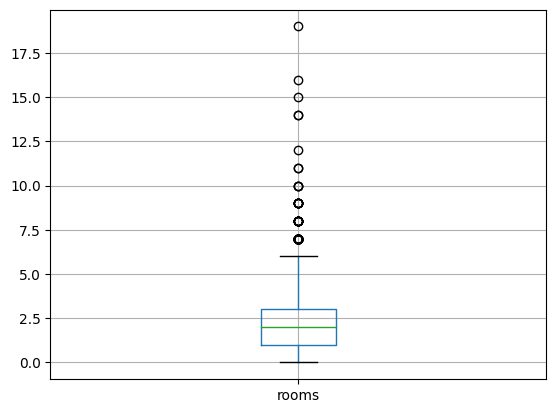

In [56]:
df.boxplot(column='rooms');

**Let's count the number of outliers in fractions.**

In [57]:
df[df['rooms'] > 6]['rooms'].count()/df['rooms'].count()

0.00379762859192371

**We see that high values for the number of rooms make up a small fraction (0.38%) of the total number of values. Let's filter the dataframe from this data.**

In [58]:
df = df[df['rooms'] < 6]

**Let's analyze the values in other columns.**

**Let's look at the boxplot diagram for the values of the `total_area` column.**

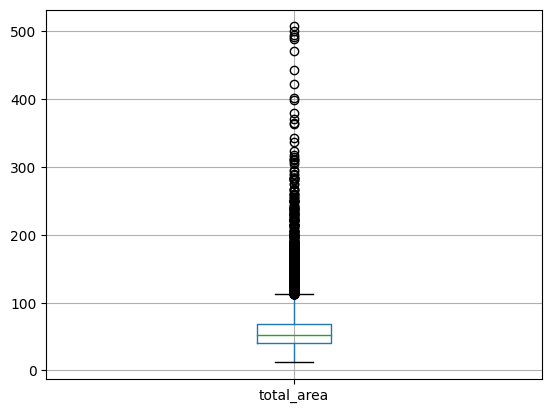

In [59]:
df.boxplot(column='total_area');

In [60]:
df[df['total_area'] > 112.5]['total_area'].count() / df['total_area'].count() #proportion of values outside the whiskers

0.04799183117767188

**Let's filter out rows with outliers of this column from the dataframe.**

In [61]:
df = df[df['total_area'] <= 112.5]

**Let's look at the boxplot diagram for the values of the `living_area` column.**

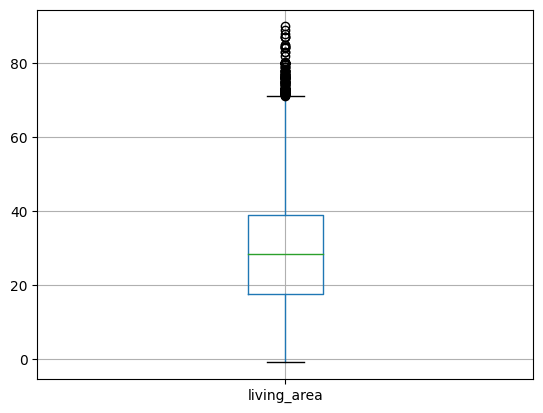

In [62]:
df.boxplot(column='living_area');

In [63]:
df[df['living_area'] > 71.1]['living_area'].count() / df['living_area'].count() #доля значений вне "усов"

0.0054969610296746515

**Let's filter out rows with outliers of this column from the dataframe.**

In [64]:
df = df[df['living_area'] <= 71.1]

**Let's look at the boxplot diagram for the values of the `kitchen_area` column.**

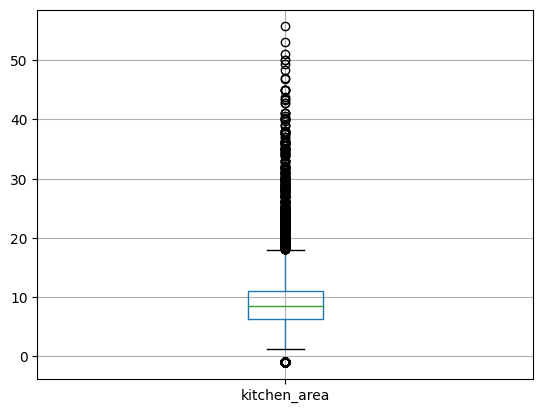

In [65]:
df.boxplot(column='kitchen_area');

In [66]:
df[df['kitchen_area'] > 18.05]['kitchen_area'].count() / df['kitchen_area'].count() #доля значений вне "усов"

0.035950208960589584

**Let's filter out rows with outliers of this column from the dataframe.**

In [67]:
df = df[df['kitchen_area'] <= 18.05]

In [68]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,id
count,21453.000000,2.145300e+04,21453.000000,21453.000000,21453.000000,21453.000000,21453.000000,21453.000000,21453.000000,21453.000000,21453.000000,21453.000000,21453.000000,21453.000000,21453.000000,21453.000000,21453.000000,21453.000000
mean,9.709271,5.041022e+06,52.971579,1.920897,2.692912,10.733277,27.947220,5.901599,8.235447,0.595628,21661.249522,11148.355102,0.425721,155.039435,0.539039,191.080408,150.911155,11862.799236
std,5.556172,2.914248e+06,18.101784,0.885185,1.060858,6.635111,14.945055,4.885980,4.128977,0.947756,16796.279787,9760.804520,0.711015,296.349108,0.838334,304.232430,205.331495,6840.290625
min,0.000000,4.300000e+05,12.000000,0.000000,-1.000000,-1.000000,-1.000000,1.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,-1.000000,1.000000
25%,6.000000,3.300000e+06,39.000000,1.000000,2.550000,5.000000,17.500000,2.000000,6.200000,0.000000,-1.000000,621.000000,0.000000,-1.000000,0.000000,-1.000000,23.000000,5918.000000
50%,9.000000,4.400000e+06,49.100000,2.000000,2.700000,9.000000,28.000000,4.000000,8.500000,0.000000,20849.000000,11673.000000,0.000000,-1.000000,0.000000,-1.000000,71.000000,11862.000000
75%,14.000000,6.000000e+06,63.700000,3.000000,2.700000,16.000000,38.400000,8.000000,10.780000,1.000000,34594.000000,15497.000000,1.000000,257.000000,1.000000,370.000000,191.000000,17777.000000
max,39.000000,4.800000e+07,112.300000,5.000000,100.000000,60.000000,71.100000,33.000000,18.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000,23698.000000


**Let's look at the boxplot diagram for the values of the `ceiling_height` column.**

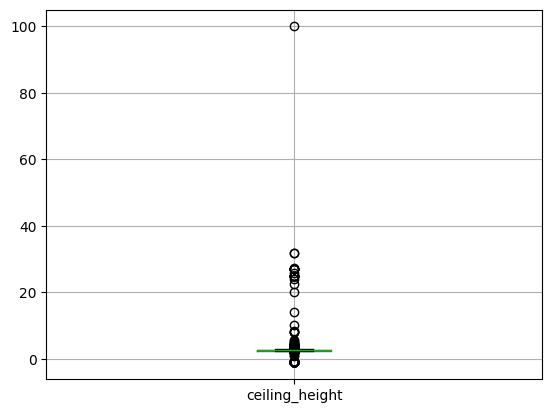

In [69]:
df.boxplot(column='ceiling_height');

**Let's limit the values to the range from 0 to 7.**

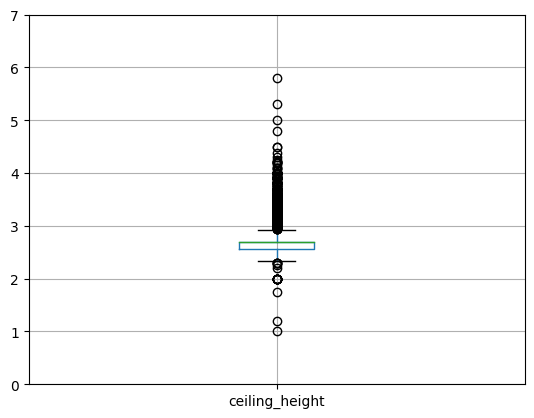

In [70]:
plt.ylim([0,7])
df.boxplot(column='ceiling_height');

**Let's count the number of outliers in fractions.**

In [71]:
df[(df['ceiling_height'] < 2.3) | (df['ceiling_height'] > 3)]['ceiling_height'].count()/df['ceiling_height'].count()

0.04861790891716776

**Всего 5% данных выбиваются, что не велико и не окажет серьезного влияния на наш анализ.**

**Посмотрим на эти значения в датафрейме.**

In [72]:
df[(df['ceiling_height'] < 2.3) | (df['ceiling_height'] > 4)].sort_values(by='ceiling_height')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,id,locality,locality_type,new_locality_name,end_date
12031,8,1800000.0,41.0,2019-03-14,2,-1.0,2,25.6,1,False,False,False,5.8,0,поселок Кобринское,-1.0,-1.0,0.0,-1.0,0.0,-1.0,-1.0,12031,Кобринское,поселок,поселок Кобринское,NaT
17676,0,450000.0,36.5,2018-02-01,1,-1.0,5,17.3,4,False,False,False,8.5,1,деревня Ям-Тесово,-1.0,-1.0,0.0,-1.0,0.0,-1.0,120.0,17676,Ям-Тесово,деревня,деревня Ям-Тесово,2018-06-01
17428,4,1450000.0,43.8,2018-12-12,2,-1.0,2,30.3,1,False,False,False,5.3,1,поселок Кирпичное,-1.0,-1.0,0.0,-1.0,0.0,-1.0,-1.0,17428,Кирпичное,поселок,поселок Кирпичное,NaT
17332,14,1580000.0,28.0,2017-11-26,1,-1.0,2,17.0,1,False,False,False,5.0,0,поселок Кобринское,-1.0,-1.0,0.0,-1.0,0.0,-1.0,44.0,17332,Кобринское,поселок,поселок Кобринское,2018-01-09
17145,3,1100000.0,52.6,2018-08-14,2,-1.0,5,-1.0,2,False,False,False,-1.0,0,посёлок Плоское,-1.0,-1.0,0.0,-1.0,0.0,-1.0,45.0,17145,Плоское,поселок,поселок Плоское,2018-09-28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17857,1,3900000.0,56.0,2017-12-22,3,27.0,5,33.0,4,False,False,False,-1.0,0,Санкт-Петербург,41030.0,15543.0,0.0,-1.0,0.0,-1.0,73.0,17857,Санкт-Петербург,город,город Санкт-Петербург,2018-03-05
21377,19,4900000.0,42.0,2017-04-18,1,27.5,24,37.7,19,False,False,False,11.0,2,Санкт-Петербург,42742.0,9760.0,0.0,-1.0,0.0,-1.0,61.0,21377,Санкт-Петербург,город,город Санкт-Петербург,2017-06-18
22336,19,9999000.0,92.4,2019-04-05,2,32.0,6,55.5,5,False,False,False,16.5,4,Санкт-Петербург,18838.0,3506.0,0.0,-1.0,3.0,511.0,-1.0,22336,Санкт-Петербург,город,город Санкт-Петербург,NaT
3148,14,2900000.0,75.0,2018-11-12,3,32.0,3,53.0,2,False,False,False,8.0,0,Волхов,-1.0,-1.0,0.0,-1.0,0.0,-1.0,-1.0,3148,Волхов,город,город Волхов,NaT


**Two-digit values starting with 2 and 3 will be corrected 10 times; most likely, users made a mistake when entering the field and did not set the decimal separator.**

In [73]:
def ceiling_height_correct(x):
    if (20 <= x) and (x < 40):
        return x / 10
    else:
        return x

df['ceiling_height'] = df['ceiling_height'].apply(ceiling_height_correct)
df[df['ceiling_height'] > 20]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,id,locality,locality_type,new_locality_name,end_date
22869,0,15000000.0,25.0,2018-07-25,1,100.0,5,14.0,5,True,False,False,11.0,5,Санкт-Петербург,34963.0,8283.0,1.0,223.0,3.0,30.0,19.0,22869,Санкт-Петербург,город,город Санкт-Петербург,2018-08-13


**Let's now check the remaining emissions. We will set conditions that correspond to the actual adequate ceiling height in the apartment.**

In [74]:
df[(df['ceiling_height'] < 2.3) | (df['ceiling_height'] > 4)].sort_values(by='ceiling_height')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,id,locality,locality_type,new_locality_name,end_date
23696,18,2500000.0,56.7,2018-02-11,2,-1.0,3,29.7,1,False,False,False,-1.0,0,село Рождествено,-1.0,-1.0,0.0,-1.0,0.0,-1.0,-1.0,23696,Рождествено,село,село Рождествено,NaT
14911,5,430000.0,54.0,2018-06-26,2,-1.0,3,-1.0,3,False,False,False,-1.0,0,посёлок станции Свирь,-1.0,-1.0,0.0,-1.0,0.0,-1.0,44.0,14911,Свирь,поселок при жд станции,поселок при жд станции Свирь,2018-08-09
14660,11,2950000.0,74.0,2017-12-05,3,-1.0,4,45.0,3,False,False,False,10.0,0,деревня Нижние Осельки,-1.0,-1.0,0.0,-1.0,0.0,-1.0,96.0,14660,Нижние Осельки,деревня,деревня Нижние Осельки,2018-03-11
19635,11,2650000.0,60.0,2016-06-05,3,-1.0,9,44.0,8,False,False,False,7.0,0,садовое товарищество Приладожский,-1.0,-1.0,0.0,-1.0,0.0,-1.0,45.0,19635,Приладожский,СНТ,СНТ Приладожский,2016-07-20
14101,8,1320000.0,32.6,2017-06-05,1,-1.0,5,18.2,1,False,False,False,5.8,1,посёлок Усть-Луга,-1.0,-1.0,0.0,-1.0,0.0,-1.0,45.0,14101,Усть-Луга,поселок,поселок Усть-Луга,2017-07-20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17442,0,5350000.0,54.0,2015-06-16,2,8.0,5,29.0,2,False,False,False,-1.0,1,Красное Село,24638.0,28062.0,0.0,-1.0,0.0,-1.0,469.0,17442,Красное Село,город,город Красное Село,2016-09-27
5863,20,5650000.0,45.0,2018-08-15,1,8.3,16,19.3,14,False,False,False,8.3,1,Санкт-Петербург,13069.0,10763.0,0.0,-1.0,1.0,613.0,14.0,5863,Санкт-Петербург,город,город Санкт-Петербург,2018-08-29
22309,20,5300000.0,45.0,2017-09-30,1,10.3,16,15.5,15,False,False,False,-1.0,0,Санкт-Петербург,36353.0,11936.0,2.0,440.0,2.0,450.0,136.0,22309,Санкт-Петербург,город,город Санкт-Петербург,2018-02-13
15061,19,5600000.0,56.4,2018-05-11,2,14.0,14,32.4,5,False,False,False,9.1,2,Санкт-Петербург,14814.0,13610.0,0.0,-1.0,0.0,-1.0,315.0,15061,Санкт-Петербург,город,город Санкт-Петербург,2019-03-22


**Instead of deleting anomalous values, we will create a new column `ceiling_height_new` in which we will assign -1 to anomalous values and omissions, and save the remaining values. Let's write a function for this and apply it. We will use common sense and consider abnormal values of ceiling heights to be values < 2 or > 6.**

In [75]:
def ceiling_height_filter(x):
    if (2 > x) or (x > 6):
        return -1
    else:
        return x

df['ceiling_height_new'] = df['ceiling_height'].apply(ceiling_height_filter)
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,id,locality,locality_type,new_locality_name,end_date,ceiling_height_new
1,7,3350000.0,40.40,2018-12-04,1,2.63,11,18.60,1,False,False,False,11.00,2,посёлок Шушары,12817.0,18603.0,0.0,-1.0,0.0,-1.0,81.0,1,Шушары,поселок,поселок Шушары,2019-02-23,2.63
2,10,5196000.0,56.00,2015-08-20,2,2.70,5,34.30,4,False,False,False,8.30,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,2,Санкт-Петербург,город,город Санкт-Петербург,2017-02-28,2.70
5,10,2890000.0,30.40,2018-09-10,1,2.65,12,14.40,5,False,False,False,9.10,0,городской посёлок Янино-1,-1.0,-1.0,0.0,-1.0,0.0,-1.0,55.0,5,Янино-1,ПГТ,ПГТ Янино-1,2018-11-04,2.65
6,6,3700000.0,37.30,2017-11-02,1,2.64,26,10.60,6,False,False,False,14.40,1,посёлок Парголово,52996.0,19143.0,0.0,-1.0,0.0,-1.0,155.0,6,Парголово,поселок,поселок Парголово,2018-04-06,2.64
8,20,2900000.0,33.16,2018-05-23,1,2.70,27,15.43,26,False,False,False,8.81,0,посёлок Мурино,-1.0,-1.0,0.0,-1.0,0.0,-1.0,189.0,8,Мурино,город,город Мурино,2018-11-28,2.70


In [76]:
df['ceiling_height_new'].describe()

count    21453.000000
mean         2.660835
std          0.323564
min         -1.000000
25%          2.550000
50%          2.700000
75%          2.700000
max          5.800000
Name: ceiling_height_new, dtype: float64

**Now we see that our filtering was applied correctly.**

**Let's look at the anomalies in other columns.**

In [77]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,id,ceiling_height_new
count,21453.000000,2.145300e+04,21453.000000,21453.000000,21453.000000,21453.000000,21453.000000,21453.000000,21453.000000,21453.000000,21453.000000,21453.000000,21453.000000,21453.000000,21453.000000,21453.000000,21453.000000,21453.000000,21453.000000
mean,9.709271,5.041022e+06,52.971579,1.920897,2.668785,10.733277,27.947220,5.901599,8.235447,0.595628,21661.249522,11148.355102,0.425721,155.039435,0.539039,191.080408,150.911155,11862.799236,2.660835
std,5.556172,2.914248e+06,18.101784,0.885185,0.744656,6.635111,14.945055,4.885980,4.128977,0.947756,16796.279787,9760.804520,0.711015,296.349108,0.838334,304.232430,205.331495,6840.290625,0.323564
min,0.000000,4.300000e+05,12.000000,0.000000,-1.000000,-1.000000,-1.000000,1.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,-1.000000,1.000000,-1.000000
25%,6.000000,3.300000e+06,39.000000,1.000000,2.550000,5.000000,17.500000,2.000000,6.200000,0.000000,-1.000000,621.000000,0.000000,-1.000000,0.000000,-1.000000,23.000000,5918.000000,2.550000
50%,9.000000,4.400000e+06,49.100000,2.000000,2.700000,9.000000,28.000000,4.000000,8.500000,0.000000,20849.000000,11673.000000,0.000000,-1.000000,0.000000,-1.000000,71.000000,11862.000000,2.700000
75%,14.000000,6.000000e+06,63.700000,3.000000,2.700000,16.000000,38.400000,8.000000,10.780000,1.000000,34594.000000,15497.000000,1.000000,257.000000,1.000000,370.000000,191.000000,17777.000000,2.700000
max,39.000000,4.800000e+07,112.300000,5.000000,100.000000,60.000000,71.100000,33.000000,18.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000,23698.000000,5.800000


**We see that in other columns there are no anomalous values that go beyond the reasonable meaning of the property characteristics (we look at the ceiling height from the new column `ceiling_height_new`).**

**Now let's check if there are lines with contradictions (excluding gaps expressed by the value -1):**
- living space is larger than the total area,
- the kitchen area is larger than the total area,
- the height of the current floor is greater than the number of storeys of the building.

In [78]:
df.query('(living_area > total_area) & (living_area != -1)')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,id,locality,locality_type,new_locality_name,end_date,ceiling_height_new


In [79]:
df.query('(kitchen_area > total_area) & (living_area != -1) & (kitchen_area != -1)')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,id,locality,locality_type,new_locality_name,end_date,ceiling_height_new


In [80]:
df[(df['floors_total'] < df['floor']) & (df['floors_total'] != -1)]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,id,locality,locality_type,new_locality_name,end_date,ceiling_height_new


**As we can see, no such anomalies were found.**

### Add new columns to the table

**3.1 Let’s add a new column, price of one square meter, to the dataframe, let’s call it `one_square_price`.**

In [81]:
df['one_square_price'] = (df['last_price'] / df['total_area']).astype(int)

In [82]:
df.describe()['one_square_price']

count     21453.000000
mean      94470.056356
std       35722.580199
min        7962.000000
25%       75060.000000
50%       93354.000000
75%      111111.000000
max      848484.000000
Name: one_square_price, dtype: float64

**3.2 Let's add a new column to the dataframe, the day of the week the ad was published (0 - Monday, 1 - Tuesday, and so on), let's call it `post_weekday`.**

In [83]:
df['post_weekday'] = df['first_day_exposition'].dt.weekday
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,id,locality,locality_type,new_locality_name,end_date,ceiling_height_new,one_square_price,post_weekday
1,7,3350000.0,40.40,2018-12-04,1,2.63,11,18.60,1,False,False,False,11.00,2,посёлок Шушары,12817.0,18603.0,0.0,-1.0,0.0,-1.0,81.0,1,Шушары,поселок,поселок Шушары,2019-02-23,2.63,82920,1
2,10,5196000.0,56.00,2015-08-20,2,2.70,5,34.30,4,False,False,False,8.30,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,2,Санкт-Петербург,город,город Санкт-Петербург,2017-02-28,2.70,92785,3
5,10,2890000.0,30.40,2018-09-10,1,2.65,12,14.40,5,False,False,False,9.10,0,городской посёлок Янино-1,-1.0,-1.0,0.0,-1.0,0.0,-1.0,55.0,5,Янино-1,ПГТ,ПГТ Янино-1,2018-11-04,2.65,95065,0
6,6,3700000.0,37.30,2017-11-02,1,2.64,26,10.60,6,False,False,False,14.40,1,посёлок Парголово,52996.0,19143.0,0.0,-1.0,0.0,-1.0,155.0,6,Парголово,поселок,поселок Парголово,2018-04-06,2.64,99195,3
8,20,2900000.0,33.16,2018-05-23,1,2.70,27,15.43,26,False,False,False,8.81,0,посёлок Мурино,-1.0,-1.0,0.0,-1.0,0.0,-1.0,189.0,8,Мурино,город,город Мурино,2018-11-28,2.70,87454,2


**3.3 Let’s add a new column to the dataframe, the month the ad was published, let’s call it `post_month`.**

In [84]:
df['post_month'] = df['first_day_exposition'].dt.month
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,id,locality,locality_type,new_locality_name,end_date,ceiling_height_new,one_square_price,post_weekday,post_month
1,7,3350000.0,40.40,2018-12-04,1,2.63,11,18.60,1,False,False,False,11.00,2,посёлок Шушары,12817.0,18603.0,0.0,-1.0,0.0,-1.0,81.0,1,Шушары,поселок,поселок Шушары,2019-02-23,2.63,82920,1,12
2,10,5196000.0,56.00,2015-08-20,2,2.70,5,34.30,4,False,False,False,8.30,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,2,Санкт-Петербург,город,город Санкт-Петербург,2017-02-28,2.70,92785,3,8
5,10,2890000.0,30.40,2018-09-10,1,2.65,12,14.40,5,False,False,False,9.10,0,городской посёлок Янино-1,-1.0,-1.0,0.0,-1.0,0.0,-1.0,55.0,5,Янино-1,ПГТ,ПГТ Янино-1,2018-11-04,2.65,95065,0,9
6,6,3700000.0,37.30,2017-11-02,1,2.64,26,10.60,6,False,False,False,14.40,1,посёлок Парголово,52996.0,19143.0,0.0,-1.0,0.0,-1.0,155.0,6,Парголово,поселок,поселок Парголово,2018-04-06,2.64,99195,3,11
8,20,2900000.0,33.16,2018-05-23,1,2.70,27,15.43,26,False,False,False,8.81,0,посёлок Мурино,-1.0,-1.0,0.0,-1.0,0.0,-1.0,189.0,8,Мурино,город,город Мурино,2018-11-28,2.70,87454,2,5


**3.4 Let’s add a new column to the dataframe, the year the ad was published, let’s call it `post_year`.**

In [85]:
df['post_year'] = df['first_day_exposition'].dt.year
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,id,locality,locality_type,new_locality_name,end_date,ceiling_height_new,one_square_price,post_weekday,post_month,post_year
1,7,3350000.0,40.40,2018-12-04,1,2.63,11,18.60,1,False,False,False,11.00,2,посёлок Шушары,12817.0,18603.0,0.0,-1.0,0.0,-1.0,81.0,1,Шушары,поселок,поселок Шушары,2019-02-23,2.63,82920,1,12,2018
2,10,5196000.0,56.00,2015-08-20,2,2.70,5,34.30,4,False,False,False,8.30,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,2,Санкт-Петербург,город,город Санкт-Петербург,2017-02-28,2.70,92785,3,8,2015
5,10,2890000.0,30.40,2018-09-10,1,2.65,12,14.40,5,False,False,False,9.10,0,городской посёлок Янино-1,-1.0,-1.0,0.0,-1.0,0.0,-1.0,55.0,5,Янино-1,ПГТ,ПГТ Янино-1,2018-11-04,2.65,95065,0,9,2018
6,6,3700000.0,37.30,2017-11-02,1,2.64,26,10.60,6,False,False,False,14.40,1,посёлок Парголово,52996.0,19143.0,0.0,-1.0,0.0,-1.0,155.0,6,Парголово,поселок,поселок Парголово,2018-04-06,2.64,99195,3,11,2017
8,20,2900000.0,33.16,2018-05-23,1,2.70,27,15.43,26,False,False,False,8.81,0,посёлок Мурино,-1.0,-1.0,0.0,-1.0,0.0,-1.0,189.0,8,Мурино,город,город Мурино,2018-11-28,2.70,87454,2,5,2018


**3.5 Let’s add a new column to the dataframe: apartment floor type (values: “first”, “last”, “other”), let’s call it `floor_type`.**

**To do this, we will create a function that will determine these values, filtering out the -1 values with which we replaced the gaps in the floor column.**

In [86]:
def identify_floor_type(row):
     if row['floors_total'] > 0:
         if row['floors_total'] == row['floor']:
             return 'last'
         elif row['floor'] == 1:
             return 'first'
         else:
             return 'other'
     else:
         return 'undefined'

df['floor_type'] = df.apply(identify_floor_type, axis=1)
df['floor_type'].value_counts()

other        15691
last          2952
first         2734
undefined       76
Name: floor_type, dtype: int64

**3.6 Let’s add a new column to the dataframe, the distance to the city center in kilometers, round it to the nearest integer and call it `to_center_km`.**

In [87]:
df['to_center_km'] = (df['city_centers_nearest'] / 1000).astype(int)
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,id,locality,locality_type,new_locality_name,end_date,ceiling_height_new,one_square_price,post_weekday,post_month,post_year,floor_type,to_center_km
1,7,3350000.0,40.40,2018-12-04,1,2.63,11,18.60,1,False,False,False,11.00,2,посёлок Шушары,12817.0,18603.0,0.0,-1.0,0.0,-1.0,81.0,1,Шушары,поселок,поселок Шушары,2019-02-23,2.63,82920,1,12,2018,first,18
2,10,5196000.0,56.00,2015-08-20,2,2.70,5,34.30,4,False,False,False,8.30,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,2,Санкт-Петербург,город,город Санкт-Петербург,2017-02-28,2.70,92785,3,8,2015,other,13
5,10,2890000.0,30.40,2018-09-10,1,2.65,12,14.40,5,False,False,False,9.10,0,городской посёлок Янино-1,-1.0,-1.0,0.0,-1.0,0.0,-1.0,55.0,5,Янино-1,ПГТ,ПГТ Янино-1,2018-11-04,2.65,95065,0,9,2018,other,0
6,6,3700000.0,37.30,2017-11-02,1,2.64,26,10.60,6,False,False,False,14.40,1,посёлок Парголово,52996.0,19143.0,0.0,-1.0,0.0,-1.0,155.0,6,Парголово,поселок,поселок Парголово,2018-04-06,2.64,99195,3,11,2017,other,19
8,20,2900000.0,33.16,2018-05-23,1,2.70,27,15.43,26,False,False,False,8.81,0,посёлок Мурино,-1.0,-1.0,0.0,-1.0,0.0,-1.0,189.0,8,Мурино,город,город Мурино,2018-11-28,2.70,87454,2,5,2018,other,0


### Exploratory data analysis

**4.1.1 Let's study the values of the column with the total area.**

**Let's first build a histogram with the number of baskets 100 for this column.**

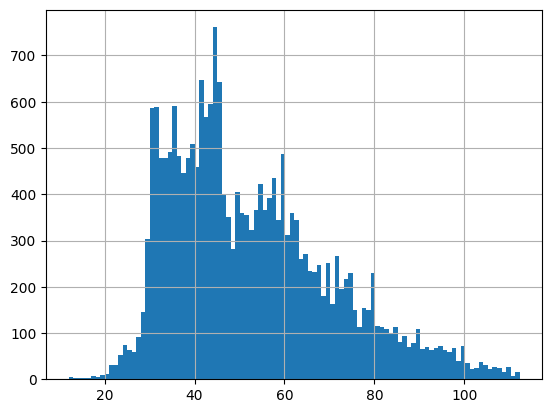

In [88]:
df['total_area'].hist(bins=100);

**We see a normal distribution of values.**

**Now let's look at the minimum, maximum and average values ​​in this column.**

In [89]:
df['total_area'].describe()

count    21453.000000
mean        52.971579
std         18.101784
min         12.000000
25%         39.000000
50%         49.100000
75%         63.700000
max        112.300000
Name: total_area, dtype: float64

**Let's create a boxplot to see which values are within the normal range and which are outliers.**

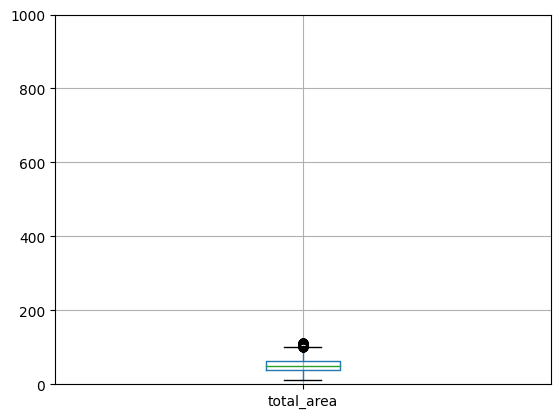

In [90]:
plt.ylim([0,1000])
df.boxplot(column='total_area');

**Let's create a range chart to see which values are within the normal range and which are outliers.**

In [91]:
def usy_boxplota(df, column):
    min = df[column].min()
    max = df[column].max()
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR  = Q3 - Q1
    lowest = (lambda: min if min > Q1 - 1.5 * IQR else Q1 - 1.5 * IQR)
    highest = (lambda: max if max < Q3 + 1.5 * IQR else Q3 + 1.5 * IQR)
    return [lowest(), highest()]

usy_boxplota(df, 'total_area')

[12.0, 100.75]

**Now let’s check how many values were included in the outliers.**

In [92]:
max = usy_boxplota(df, 'total_area')[1]
df.query('total_area > @max')['total_area'].count() / df['total_area'].count()

0.012865333519787442

**Only 1.3% of values, which is not at all critical for using all values for further analysis.**

**4.1.2 Let’s study the values of the column with living space.**

**First we will create a histogram with the number of baskets 20 for this column without taking into account the gaps indicated by the value -1.**

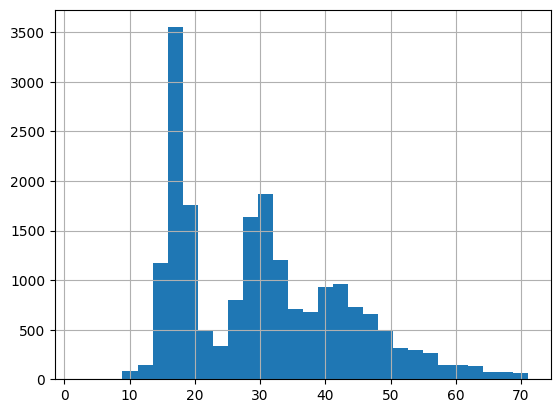

In [97]:
t2 = df.query('living_area > 0').copy()
t2['living_area'].hist(bins=30);

**We see an unusual distribution of values with two peaks.**

**Now we determine which groups of values formed these two vertices.**

In [98]:
pd.cut(t2['living_area'], bins=30).sort_values(ascending=False).value_counts().head(20)

(15.82, 18.123]     3548
(29.64, 31.943]     1865
(18.123, 20.427]    1757
(27.337, 29.64]     1637
(31.943, 34.247]    1207
(13.517, 15.82]     1179
(41.157, 43.46]      965
(38.853, 41.157]     927
(25.033, 27.337]     798
(43.46, 45.763]      729
(34.247, 36.55]      706
(36.55, 38.853]      682
(45.763, 48.067]     658
(48.067, 50.37]      497
(20.427, 22.73]      496
(22.73, 25.033]      333
(50.37, 52.673]      312
(52.673, 54.977]     294
(54.977, 57.28]      269
(57.28, 59.583]      148
Name: living_area, dtype: int64

**Let's study the origin of these two peaks in the dataframe.**

**Assume a connection between peaks and two types of real estate, i.e. private houses and apartments. We don’t have a column that reflects this question, but let’s see how the number of types of settlements correlates in these two leading area ranges. Indirectly, we can assume that in the city apartments are mainly sold, and in villages, etc., private houses.**

In [99]:
display(t2.query('(living_area <= 18.123) & (living_area > 15.82)')['locality_type']
                .reset_index()['locality_type']
                .value_counts()
       .head())

(t2.query('(living_area <= 31.943) & (living_area > 29.64)')['locality_type']
                .reset_index()['locality_type']
                .value_counts()
       .head())

город                     3020
поселок                    299
деревня                    126
ПГТ                         94
поселок при жд станции       4
Name: locality_type, dtype: int64

город      1603
поселок     133
деревня      69
ПГТ          50
село          5
Name: locality_type, dtype: int64

**The connection between the two peaks and the type of settlement was not confirmed.**
**In a similar way, connections were checked with the apartment, open plan and studio, but no direct connection was confirmed anywhere.**

**Let’s now check the connection with the number of rooms.**

In [100]:
t2['rooms'].value_counts().head() #let's look at the distribution by number of rooms

1    7249
2    6922
3    4710
4     617
0     183
Name: rooms, dtype: int64

**We see in the dataframe an almost equal number of 1-room and 2-room objects.**

**Let's look at the relationship between these ranges and the number of rooms in the property.**

In [101]:
display(t2.query('(living_area <= 18.123) & (living_area > 15.82)')
                .reset_index()['rooms']
                .value_counts()
       .head())

(t2.query('(living_area <= 31.943) & (living_area > 29.64)')
                .reset_index()['rooms']
                .value_counts()
       .head())

1    3457
0      69
2      20
3       2
Name: rooms, dtype: int64

2    1752
3      71
1      40
4       1
0       1
Name: rooms, dtype: int64

**We see that there is a direct relationship between the range of living space and the number of rooms in the property. At the same time, we determined above that the dataframe contains a very close number of advertisements with 1-room and 2-room properties. It is obvious that the living area depends directly on the number of rooms in the property, which is confirmed by two characteristic peaks in the histogram. The number of objects with 3 rooms is less than with 1 or 2, but let's see if we see the characteristic 3 peak in the histogram if we increase the number of baskets in it.**

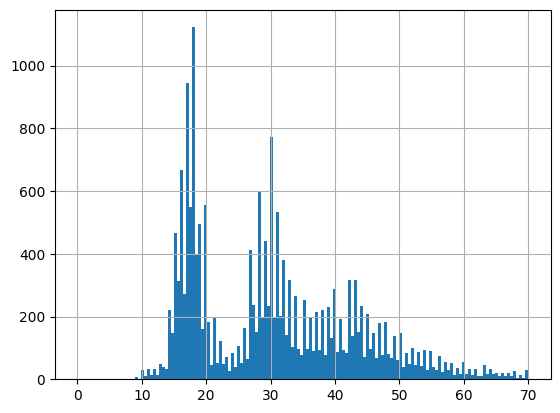

In [103]:
t2['living_area'].hist(bins=150, range=(0, 70));

**A more detailed examination of the histogram with a larger number of baskets clearly shows a modulation depending on the number of rooms in the apartment, which is logical. The nature of the anomalous peaks in the histogram for the residential area is explained.**

**Now let's look at the minimum, maximum and average values ​​in this column.**

In [104]:
t2['living_area'].describe()

count    19727.000000
mean        30.479936
std         12.773571
min          2.000000
25%         18.100000
50%         29.400000
75%         39.700000
max         71.100000
Name: living_area, dtype: float64

**Let's create a boxplot to see which values are within the normal range and which are outliers.**

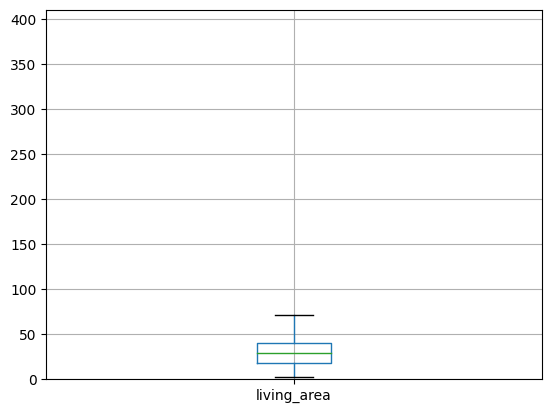

In [105]:
plt.ylim([0,410])
t2.boxplot(column='living_area');

**Now we find out the numerical values that correspond to the ends of the “whiskers” of the diagram to estimate how many values fall outside the normal range and are outliers.**

In [106]:
usy_boxplota(t2, 'living_area')

[2.0, 71.1]

**Now let’s check how many values were included in the outliers.**

In [107]:
max = usy_boxplota(t2, 'living_area')[1]
t2.query('living_area > @max')['living_area'].count() / t2['living_area'].count()

0.0

**Total 0 values, which is excellent for further analysis.**

**4.1.3 Let’s study the values of the column with kitchen area.**

**First we will construct a histogram with the number of baskets 15 for a given column without taking into account the gaps indicated by the value -1.**

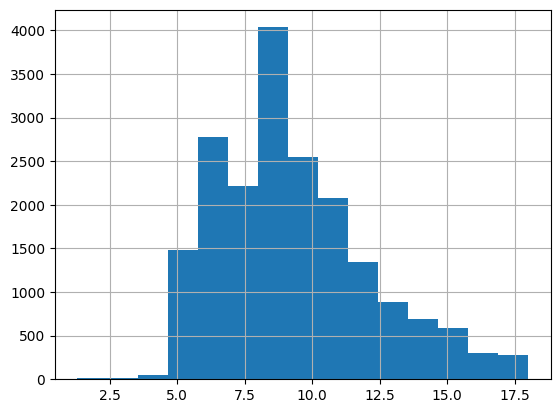

In [108]:
t3 = df.query('kitchen_area > 0').copy()
t3['kitchen_area'].hist(bins=15);

**We see a normal distribution of values.**

**In comparison with the living area, we do not observe the characteristic several peaks, because usually there is not such a discrete connection between the number of rooms and the kitchen area as there is between the number of rooms and the living area.**

**Now let's look at the minimum, maximum and average values ​​in this column.**

In [109]:
t3['kitchen_area'].describe()

count    19306.000000
mean         9.262511
std          2.898912
min          1.300000
25%          7.000000
50%          9.000000
75%         11.000000
max         18.000000
Name: kitchen_area, dtype: float64

**Let's create a boxplot to see which values are within the normal range and which are outliers.**

<Axes: >

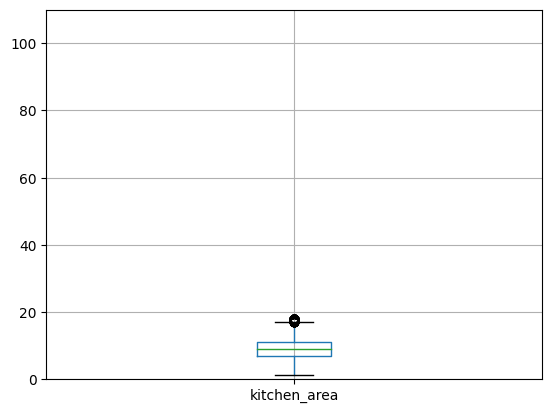

In [110]:
plt.ylim([0,110])
t3.boxplot(column='kitchen_area')

**Now we find out the numerical values that correspond to the ends of the “whiskers” of the diagram to estimate how many values fall outside the normal range and are outliers.**

In [111]:
usy_boxplota(t3, 'kitchen_area')

[1.3, 17.0]

**Now let’s check how many values were included in the outliers.**

In [112]:
max = usy_boxplota(t3, 'kitchen_area')[1]
t3.query('kitchen_area > @max')['kitchen_area'].count() / t3['kitchen_area'].count()

0.009271728996166994

**Only 0.9% of values, which is not at all critical for using all values for further analysis.**

**4.1.4 Let's study the values of the column with the price of the object.**

**Let's first build a histogram with the number of baskets 100 for a given column with a price range of up to 10^8.**

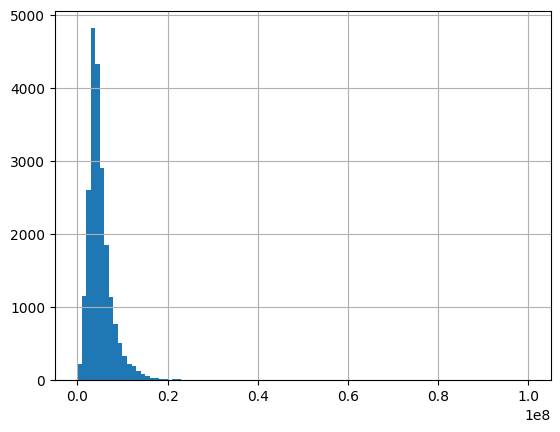

In [113]:
df['last_price'].hist(bins=100, range=(0, 10 ** 8));

**We see a normal distribution of values.**

**Now let's look at the minimum, maximum and average values ​​in this column.**

In [114]:
df['last_price'].describe()

count    2.145300e+04
mean     5.041022e+06
std      2.914248e+06
min      4.300000e+05
25%      3.300000e+06
50%      4.400000e+06
75%      6.000000e+06
max      4.800000e+07
Name: last_price, dtype: float64

**Let's create a boxplot chart to see which values are within the normal range and which are outliers.**

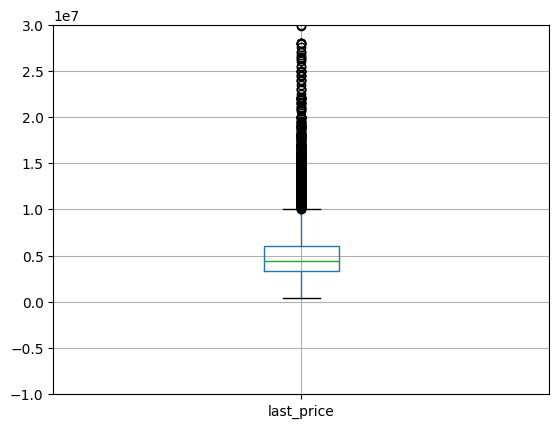

In [115]:
plt.ylim([-10000000, 3*10 ** 7])
df.boxplot(column='last_price');

**Now we find out the numerical values that correspond to the ends of the “whiskers” of the diagram to estimate how many values fall outside the normal range and are outliers.**

In [116]:
usy_boxplota(df, 'last_price')

[430000.0, 10050000.0]

**Now let’s check how many values were included in the outliers.**

In [117]:
max = usy_boxplota(df, 'last_price')[1]
df.query('last_price > @max')['last_price'].count() / df['last_price'].count()

0.051554561133640986

**Only 5% of values, which is not at all critical for using all values for further analysis.**

**4.1.5 Let’s study the values of the column with the number of rooms.**

**Let's first build a histogram with the number of baskets 10 for this column.**

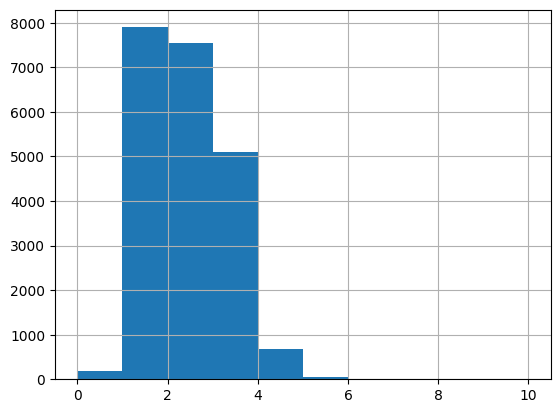

In [118]:
df['rooms'].hist(bins=10, range=(0, 10));

**We see a normal distribution of values. Earlier in paragraph 4.1.2 we already noted an equal number of objects with 1 and 2 rooms, as a result of which we see two adjacent vertices.**

**Now let's look at the minimum, maximum and average values ​​in this column.**

In [119]:
df['rooms'].describe()

count    21453.000000
mean         1.920897
std          0.885185
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          5.000000
Name: rooms, dtype: float64

**Let's create a boxplot chart to see which values are within the normal range and which are outliers.**

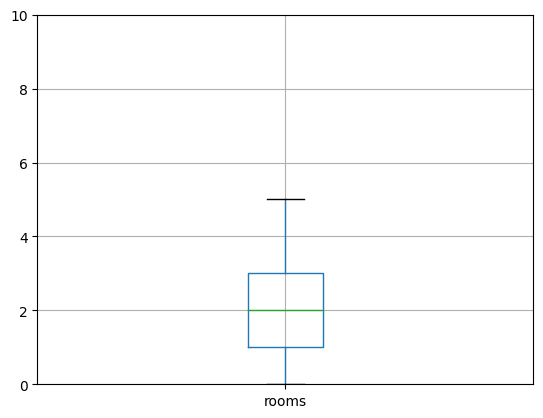

In [120]:
plt.ylim([0,10])
df.boxplot(column='rooms');

**Now we find out the numerical values that correspond to the ends of the “whiskers” of the diagram to estimate how many values fall outside the normal range and are outliers.**

In [121]:
usy_boxplota(df, 'rooms')

[0, 5]

**Now let’s check how many values were included in the outliers.**

In [122]:
max = usy_boxplota(df, 'rooms')[1]
df.query('rooms > @max')['rooms'].count() / df['rooms'].count()

0.0

**Total 0 values, which is great for further analysis.**

**4.1.6 Let's study the values of the column with ceiling heights.**

**First we will create a histogram with the number of baskets 30 for a given column without taking into account the gaps indicated by the value -1.**

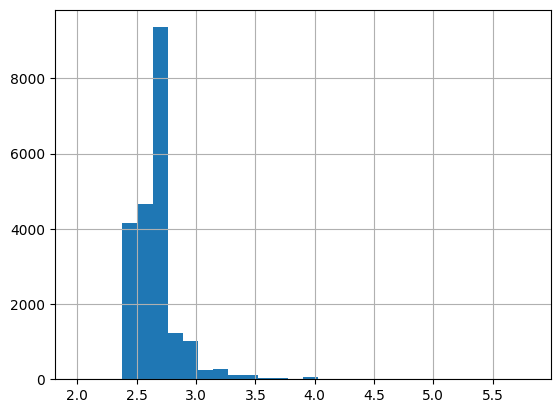

In [123]:
t6 = df.query('ceiling_height_new > 0')
t6['ceiling_height_new'].hist(bins=30);

**We see a normal distribution of values.**

**Now let's look at the minimum, maximum and average values ​​in this column.**

In [124]:
t6['ceiling_height_new'].describe()

count    21344.000000
mean         2.679531
std          0.190881
min          2.000000
25%          2.550000
50%          2.700000
75%          2.700000
max          5.800000
Name: ceiling_height_new, dtype: float64

**Let's create a boxplot chart to see which values are within the normal range and which are outliers.**



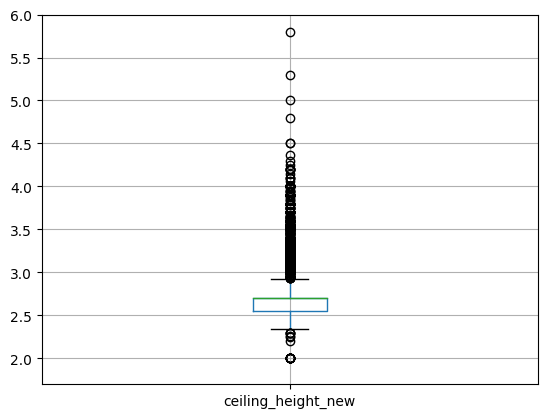

In [125]:
plt.ylim([1.7, 6])
t6.boxplot(column='ceiling_height_new');

**Now we find out the numerical values that correspond to the ends of the “whiskers” of the diagram to estimate how many values fall outside the normal range and are outliers.**

In [126]:
usy_boxplota(t6, 'ceiling_height_new')

[2.3249999999999993, 2.9250000000000007]

**Now let’s check how many values were included in the outliers.**

In [127]:
min = usy_boxplota(t6, 'ceiling_height_new')[0]
max = usy_boxplota(t6, 'ceiling_height_new')[1]
df.query('(ceiling_height_new > @max) | (ceiling_height_new < @min)') \
['ceiling_height_new'].count() / df['ceiling_height_new'].count()

0.0886589288211439

**9% of values were outliers.**

**4.1.7 Let's study the values of the column with the floor of the object.**

**Let's first build a histogram with the number of baskets 15 for this column.**

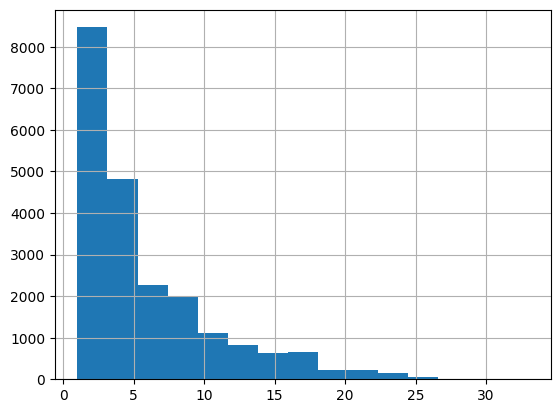

In [128]:
df['floor'].hist(bins=15);

**We see a normal distribution of values.**

**Now let's look at the minimum, maximum and average values ​​in this column.**

In [129]:
df['floor'].describe()

count    21453.000000
mean         5.901599
std          4.885980
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

**Let's create a boxplot chart to see which values are within the normal range and which are outliers.**

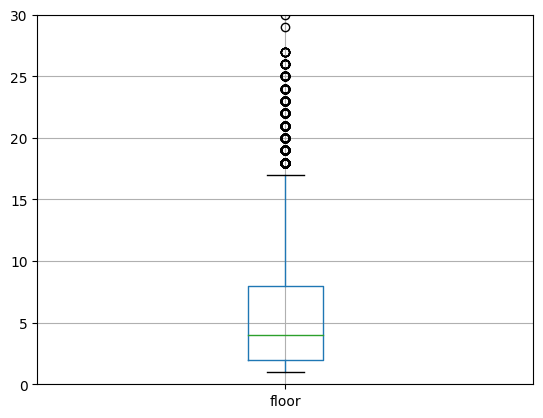

In [130]:
plt.ylim([0,30])
df.boxplot(column='floor');

**Now we find out the numerical values that correspond to the ends of the “whiskers” of the diagram to estimate how many values fall outside the normal range and are outliers.**

In [131]:
usy_boxplota(df, 'floor')

[1, 17.0]

**Now let’s check how many values were included in the outliers.**

In [132]:
max_floor = usy_boxplota(df, 'floor')[1]
count_greater_than_max = df[df['floor'] > max_floor]['floor'].count()
total_count = df['floor'].count()
result = count_greater_than_max / total_count
result

0.038456159977625505

**Only 4% of values, which is not at all critical for using all values for further analysis.**

**4.1.8 Let’s study the values of the column with the apartment floor type.**

In [ ]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,id,locality,locality_type,new_locality_name,end_date,ceiling_height_new,one_square_price,post_weekday,post_month,post_year,floor_type,to_center_km
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,-1.0,0,Санкт-Петербург,город,город Санкт-Петербург,NaT,2.70,120370,3,3,2019,другой,16
1,7,3350000.0,40.4,2018-12-04,1,2.63,11,18.6,1,False,False,False,11.0,2,посёлок Шушары,12817.0,18603.0,0.0,-1.0,0.0,-1.0,81.0,1,Шушары,поселок,поселок Шушары,2019-02-23,2.63,82920,1,12,2018,первый,18
2,10,5196000.0,56.0,2015-08-20,2,2.70,5,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,2,Санкт-Петербург,город,город Санкт-Петербург,2017-02-28,2.70,92785,3,8,2015,другой,13
3,0,64900000.0,159.0,2015-07-24,3,2.70,14,-1.0,9,False,False,False,-1.0,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,3,Санкт-Петербург,город,город Санкт-Петербург,2016-09-20,2.70,408176,4,7,2015,другой,6
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,4,Санкт-Петербург,город,город Санкт-Петербург,2018-10-18,3.03,100000,1,6,2018,другой,8


**Let's first create a histogram with the number of baskets 8 for this column.**

<Axes: >

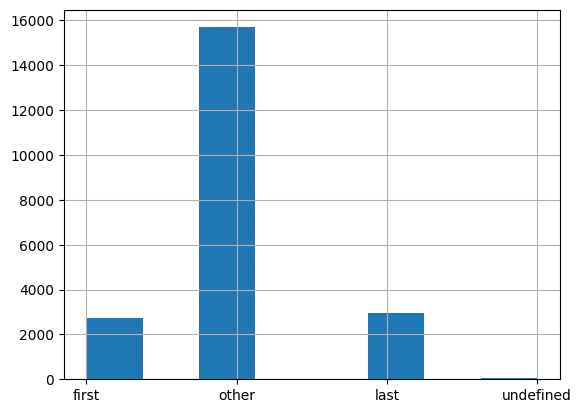

In [133]:
df['floor_type'].hist(bins=8)

**We see a discrete distribution of values, because the values of this column are discrete in nature - this is a categorical variable. Constructing its histogram is uninformative; you can limit yourself to a bar chart.**

**We see that the meaning “other” greatly prevails, the last floor is in 2nd place in terms of prevalence, however, the number of advertisements with the first and last floor is quite close relative to the total number of advertisements.**

**4.9 Let’s study the values of the column with the total number of floors in the house.**

**First we will construct a histogram with the number of baskets 15 for this column without taking into account the gaps indicated by the value -1.**

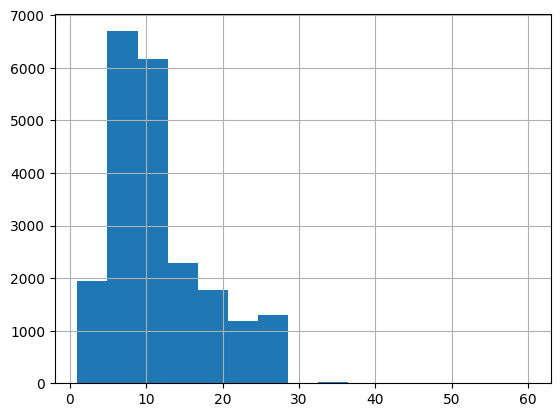

In [135]:
t9 = df.query('floors_total > 0')
t9['floors_total'].hist(bins=15);

**We see a normal distribution of values.**

**Now let's look at the minimum, maximum and average values ​​in this column.**

In [136]:
t9['floors_total'].describe()

count    21377.000000
mean        10.774992
std          6.609842
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

**Let's create a boxplot chart to see which values are within the normal range and which are outliers.**

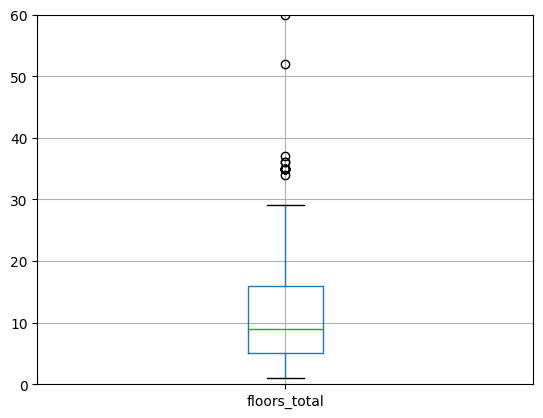

In [137]:
plt.ylim([0,60])
t9.boxplot(column='floors_total');

**Now we find out the numerical values that correspond to the ends of the “whiskers” of the diagram to estimate how many values fall outside the normal range and are outliers.**

In [138]:
usy_boxplota(t9, 'floors_total')

[1, 32.5]

**Now let’s check how many values were included in the outliers.**

In [139]:
max = usy_boxplota(t9, 'floors_total')[1]
t9.query('floors_total > @max')['floors_total'].count() / t9['floors_total'].count()

0.0010291434719558405

**Only 0.1% of values, which is not at all critical for using all values for further analysis.**

**4.1.10 Let’s study the values of the column distance to the city center in meters.**

**First we will construct a histogram with the number of bins 30 for a given column, excluding the -1 values corresponding to gaps in the data.**

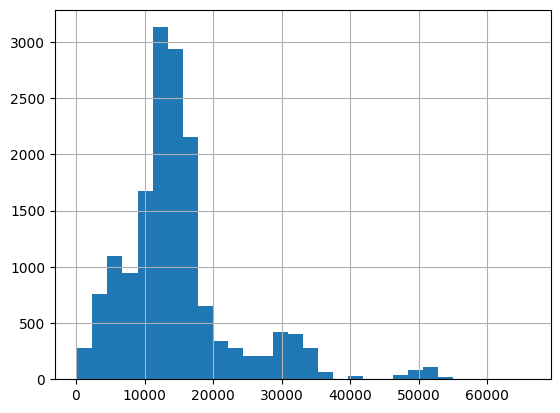

In [141]:
t10 = df.query('city_centers_nearest >= 0')
t10['city_centers_nearest'].hist(bins=30);

**We see a normal distribution of values.**

**Now let's look at the minimum, maximum and average values ​​in this column.**

In [142]:
t10['city_centers_nearest'].describe()

count    16104.000000
mean     14851.652447
std       8480.178526
min        208.000000
25%      10472.000000
50%      13507.000000
75%      16645.000000
max      65968.000000
Name: city_centers_nearest, dtype: float64

**Let's create a boxplot chart to see which values are within the normal range and which are outliers.**

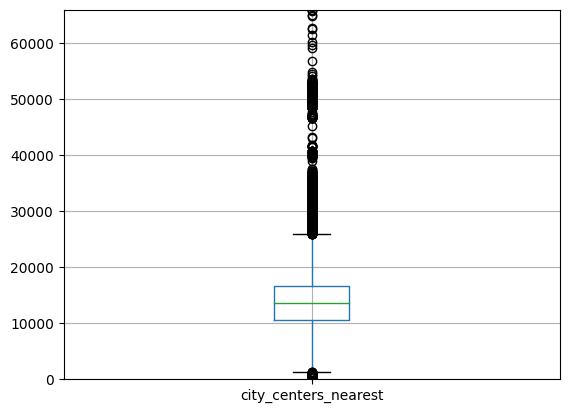

In [143]:
plt.ylim([0,66000])
t10.boxplot(column='city_centers_nearest');

**Now we find out the numerical values that correspond to the ends of the “whiskers” of the diagram to estimate how many values fall outside the normal range and are outliers.**

In [144]:
usy_boxplota(t10, 'city_centers_nearest')

[1212.5, 25904.5]

**Now let’s check how many values were included in the outliers.**

In [145]:
max = usy_boxplota(t10, 'city_centers_nearest')[1]
t10.query('city_centers_nearest > @max')['city_centers_nearest'].count() / df['city_centers_nearest'].count()

0.07989558569896985

**Only 8% of values, which is not at all critical for using all values for further analysis.**

**4.1.11 Let’s study the values of the distance to the nearest airport column.**

**Let's first create a histogram with the number of baskets 20 for a given column, excluding gaps in the form of values -1.**



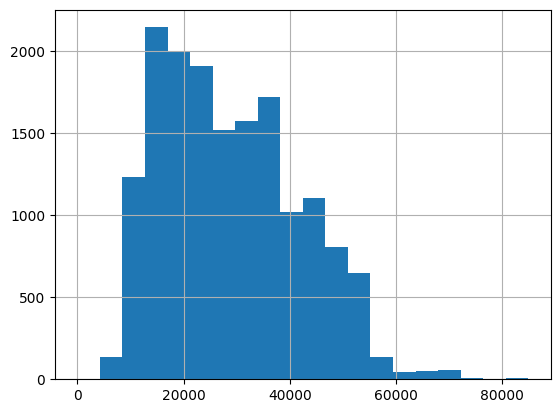

In [146]:
t11 = df.query('airports_nearest >= 0')
t11['airports_nearest'].hist(bins=20);

**We see a normal distribution of values.**

**Now let's look at the minimum, maximum and average values ​​in this column.**

In [147]:
t11['airports_nearest'].describe()

count    16088.000000
mean     28885.141161
std      12942.827852
min          0.000000
25%      18041.750000
50%      27098.500000
75%      37625.000000
max      84869.000000
Name: airports_nearest, dtype: float64

**Let's create a boxplot chart to see which values are within the normal range and which are outliers.**

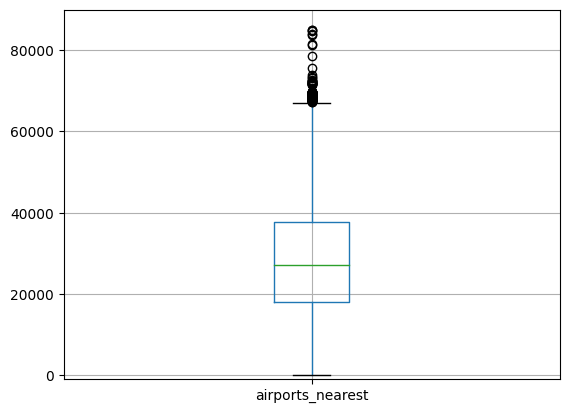

In [148]:
plt.ylim([-1000,90000])
t11.boxplot(column='airports_nearest');

**Now we find out the numerical values that correspond to the ends of the “whiskers” of the diagram to estimate how many values fall outside the normal range and are outliers.**

In [149]:
usy_boxplota(t11, 'airports_nearest')

[0.0, 66999.875]

**Now let’s check how many values were included in the outliers.**

In [150]:
max = usy_boxplota(t11, 'airports_nearest')[1]
t11.query('airports_nearest > @max')['airports_nearest'].count() / t11['airports_nearest'].count()

0.0052834410740924915

**Only 0.5% of values, which is not at all critical for using all values for further analysis.**

**4.1.12 Let’s study the values of the distance to the nearest park column.**

**Let's first build a histogram with the number of baskets 50 for a given column, excluding gaps in the form of values -1.**

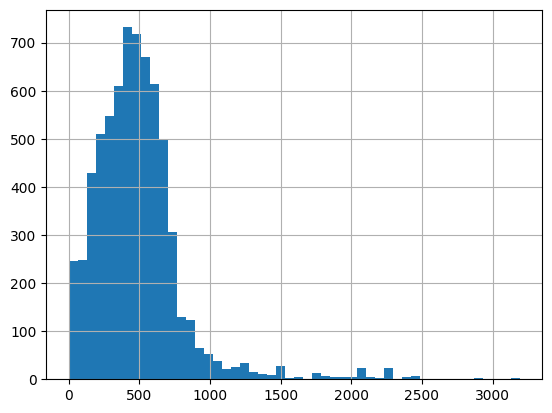

In [151]:
t12 = df.query('parks_nearest >= 0')
t12['parks_nearest'].hist(bins=50);

**We see a normal distribution of values.**

**Now let's look at the minimum, maximum and average values ​​in this column.**

In [152]:
t12['parks_nearest'].describe()

count    6804.000000
mean      490.992063
std       334.099664
min         1.000000
25%       289.000000
50%       456.000000
75%       616.000000
max      3190.000000
Name: parks_nearest, dtype: float64

**Let's create a boxplot chart to see which values are within the normal range and which are outliers.**

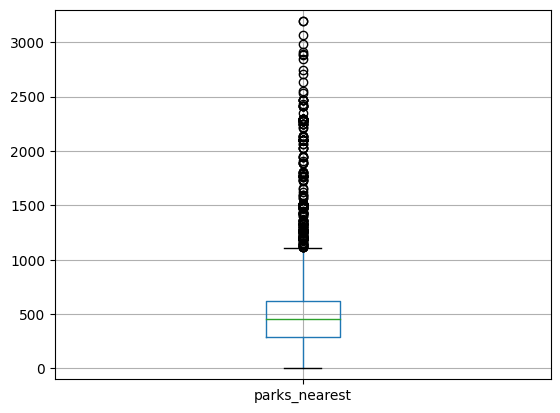

In [153]:
plt.ylim([-100,3300])
t12.boxplot(column='parks_nearest');

**Now we find out the numerical values that correspond to the ends of the “whiskers” of the diagram to estimate how many values fall outside the normal range and are outliers.**

In [154]:
usy_boxplota(t12, 'parks_nearest')

[1.0, 1106.5]

**Now let’s check how many values were included in the outliers.**

In [155]:
max = usy_boxplota(t12, 'parks_nearest')[1]
t12.query('parks_nearest > @max')['parks_nearest'].count() / t12['parks_nearest'].count()

0.03718400940623163

**Only 3.7% of values, which is not at all critical for using all values for further analysis.**

**4.1.13 Let’s study the values of the column with the day the ad was published.**

**Let's first create a histogram with the number of baskets 7 for this column.**

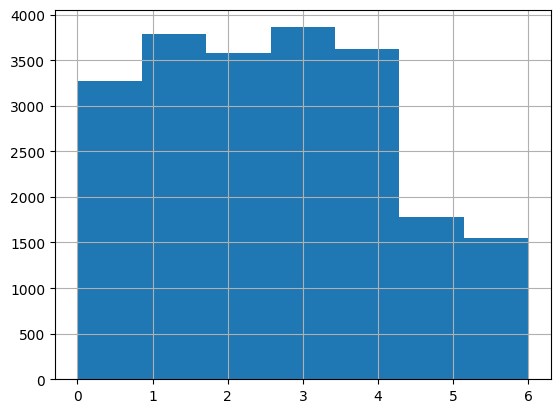

In [157]:
df['post_weekday'].hist(bins=7);

**We see that on weekends there is a decline in the submission of advertisements, and from Monday their number increases, with the highest values occurring on Tuesday and Thursday.**

**Because This is a categorical variable and is best viewed as a bar graph.**

**4.1.14 Let’s study the values of the column with the month the ad was published.**

**Let's first build a histogram with the number of baskets 12 for this column.**

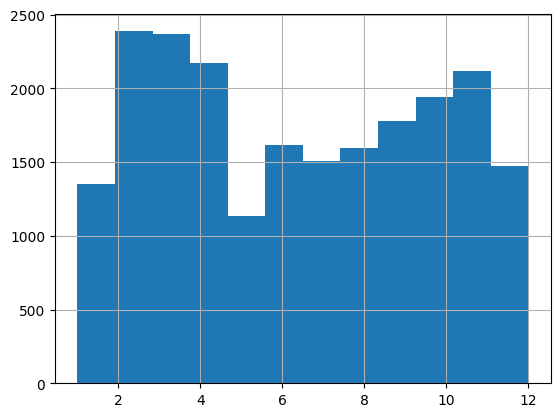

In [159]:
df['post_month'].hist(bins=12);

**We see that the decline in the placement of advertisements occurs in January, May and December, which is logical due to long public holidays during these months. After January, the number of advertisements increases sharply, then a smooth decline until March and a sharp decline in April, after April there is a smooth increase until November.**

**Because Since we're dealing with a categorical variable, it's best to look at the distribution on a regular bar graph.**

**4.2 Let's study how quickly apartments sold (column `days_exposition`). This parameter shows how many days each ad was posted.**

**First we will construct a histogram with the number of bins 70 for this column, excluding the -1 values corresponding to gaps in the data.**

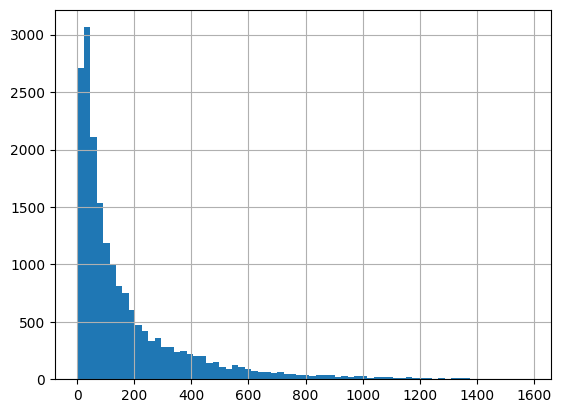

In [160]:
t20 = df.query('days_exposition > 0')
t20['days_exposition'].hist(bins=70);

**We see a normal distribution of values.**

**Now let's look at the minimum, maximum and average values ​​in this column.**

In [161]:
t20['days_exposition'].describe()

count    18785.000000
mean       172.486825
std        210.727555
min          1.000000
25%         44.000000
50%         91.000000
75%        218.000000
max       1580.000000
Name: days_exposition, dtype: float64

**Usually the sale takes 91 days, we can see by the median value.**

**Let's create a boxplot chart to see which values are within the normal range and which are outliers.**

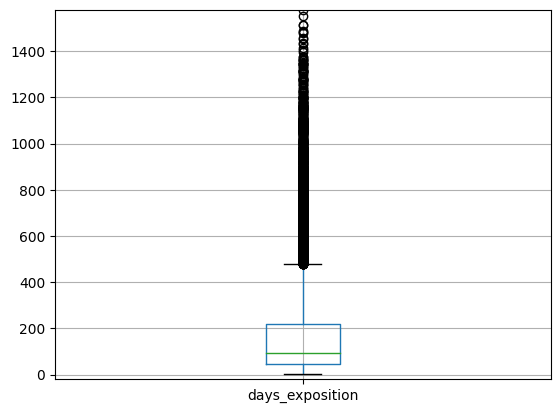

In [163]:
plt.ylim([-20,1580])
t20.boxplot(column='days_exposition');

**Now we find out the numerical values that correspond to the ends of the “whiskers” of the diagram to estimate how many values fall outside the normal range and are outliers.**

In [164]:
usy_boxplota(t20, 'days_exposition')

[1.0, 479.0]

**Unusually long sales - sales over 479 days. Unusually fast - on the day the ad was posted.**

**Now let’s check how many values were included in the outliers.**

In [165]:
max = usy_boxplota(t20, 'days_exposition')[1]
t20.query('days_exposition > @max')['days_exposition'].count() / t20['days_exposition'].count()

0.08379025818472186

**Only 8% of values are outliers.**

**4.3 Let’s determine which factors most influence the total (full) cost of the object.**

**We will study whether the price depends on:**
- total area;
- living space;
- kitchen area;
- number of rooms;
- the floor on which the apartment is located (first, last, other);
- dates of placement (day of week, month, year).

**We will construct graphs that will show the dependence of the price on the above parameters. We will use pivot tables to prepare data before visualization.**

**Let's look at the correlation between the cost and the specified parameters. Let's find the Pearson correlation coefficient.**

In [167]:
df_for_corr = (df[['total_area', 'last_price', 'living_area', 'kitchen_area',
            'rooms', 'floor_type']].copy()
        .query('living_area > 0 & kitchen_area > 0')
       ) #filtered from the original df only the columns of interest to us without gaps (values -1)
df_for_corr.corr(numeric_only=True)['last_price'].reset_index() #used a method to find correlations

,index,last_price
0,total_area,0.673769
1,last_price,1.000000
2,living_area,0.556861
3,kitchen_area,0.479644
4,rooms,0.396580


**For categorical columns, such as day, month and year of ad placement, it is incorrect to use this method. Let's compare the median cost values for the unique values of these columns and build bar charts for them.**

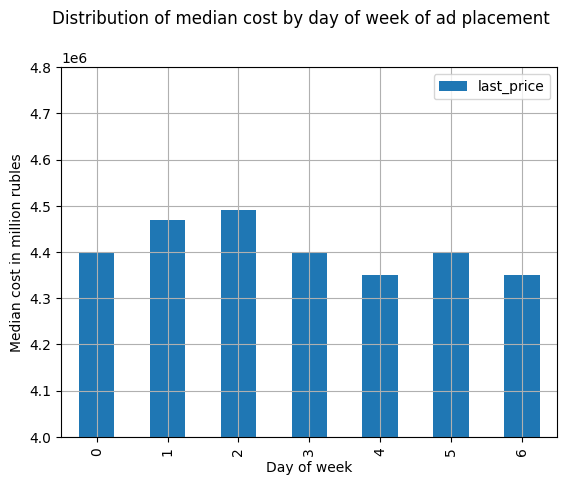

In [168]:
(df
  .pivot_table(index='post_weekday', values='last_price', aggfunc='median')
  .plot(kind='bar'));
plt.xlabel('Day of week');
plt.ylim(4*10**6, 4.8*10**6)
plt.ylabel('Median cost in million rubles');
plt.grid(True)
plt.suptitle('Distribution of median cost by day of week of ad placement', size=12, y=1);
plt.show()

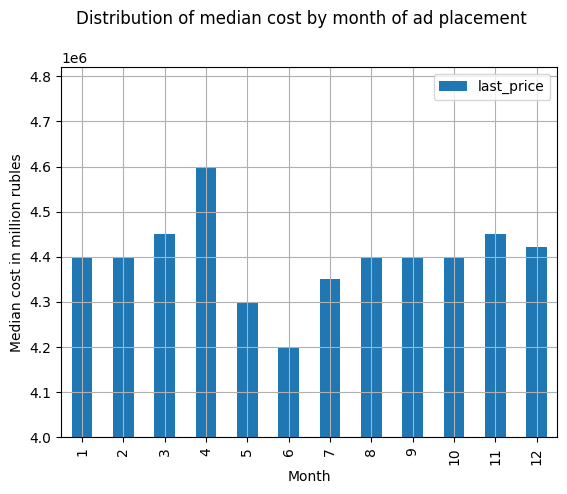

In [169]:
(df
  .pivot_table(index='post_month', values='last_price', aggfunc='median')
  .plot(kind='bar'));
plt.xlabel('Month');
plt.ylim(4*10**6, 4.82*10**6)
plt.ylabel('Median cost in million rubles');
plt.grid(True)
plt.suptitle('Distribution of median cost by month of ad placement', size=12, y=1);
plt.show()

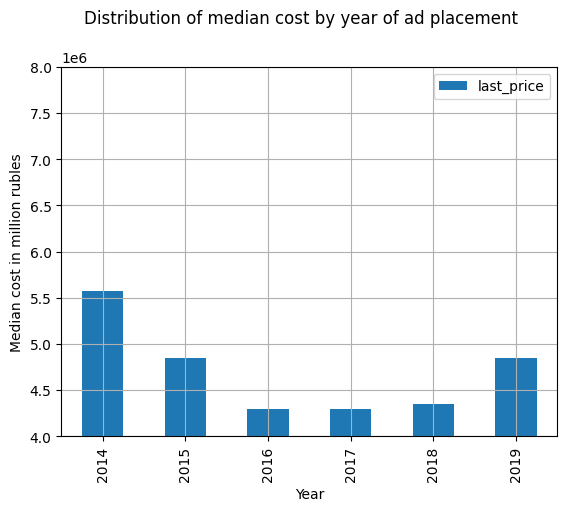

In [170]:
(df
  .pivot_table(index='post_year', values='last_price', aggfunc='median')
  .plot(kind='bar'));
plt.xlabel('Year');
plt.ylim(4*10**6, 8*10**6)
plt.ylabel('Median cost in million rubles');
plt.grid(True)
plt.suptitle('Distribution of median cost by year of ad placement', size=12, y=1);
plt.show()

**So what do we see:**

- The dependence of the cost on the total area is quite strong.
- There is a dependence of cost on living space, but it is weaker than on the total area.
- There is a dependence of cost on the kitchen area, but it is even weaker, i.e. Overall not too strong.
- There is a dependence of the cost on the number of rooms, but it is very weak, even weaker than on the kitchen area.
- The highest median value is typical for Tuesday, after which it declines until Sunday.
- On average, April accounts for the most expensive cost of objects, and June - the cheapest.
- In 2014, the median cost of an object was significantly higher than other years, then there was a decline in value before 2017 and after 2017 there was a slight increase.

**Now let's look at this in the scatterplots.**

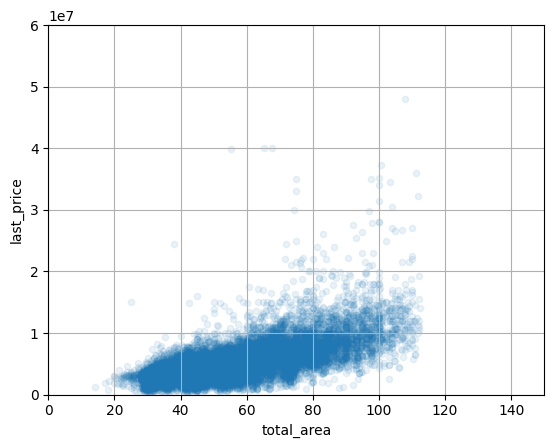

In [180]:
df_for_corr.plot(x='total_area', y='last_price', kind='scatter', alpha=0.09, grid=True, xlim=(0,150), ylim=(0,6*10**7));

**We see that a linear relationship can be traced, but with an area of 80 and above, the values begin to differ very much, in which case some additional factors already influence the cost. factors.**

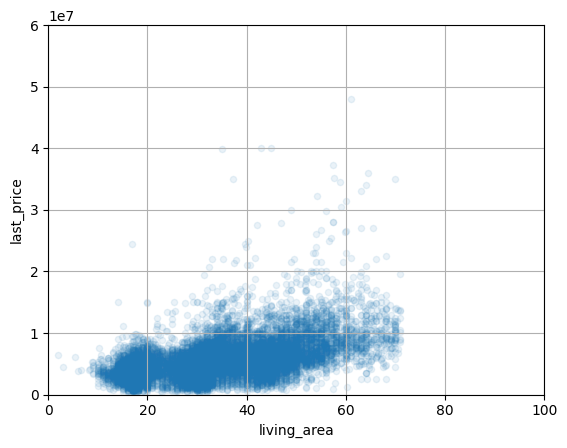

In [183]:
df_for_corr.plot(x='living_area', y='last_price', kind='scatter', alpha=0.09, grid=True, xlim=(0,100), ylim=(0,6*10**7));

**We see that a linear relationship can be traced, but with an area of 40 and above, the values begin to differ very much, in which case some additional factors already influence the cost. factors.**

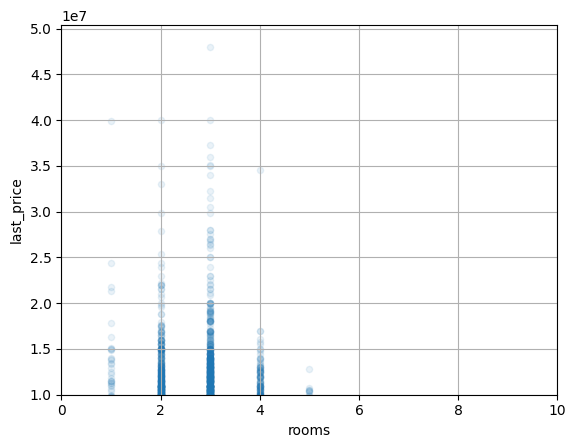

In [185]:
df_for_corr.plot(x='rooms', y='last_price', kind='scatter', alpha=0.09, grid=True, xlim=(0,10), ylim=(1*10**7));

**4.4 Let’s calculate the average price of one square meter in 10 localities with the largest number of advertisements. We will highlight settlements with the highest and lowest cost per square meter.**

In [186]:
top10 = df['new_locality_name'].value_counts().head(10).reset_index().copy() #highlighted the top 10 settlements
top10.rename(columns={'index': 'new_locality_name', 'new_locality_name': 'count'}, inplace=True) #changed column names
top10

,new_locality_name,count
0,город Санкт-Петербург,13758
1,город Мурино,574
2,город Кудрово,440
3,поселок Шушары,431
4,город Всеволожск,385
5,город Колпино,331
6,город Пушкин,329
7,поселок Парголово,317
8,город Гатчина,301
9,город Выборг,222


In [187]:
#created a pivot table for us. points and the median value of the “square” and combined with the table above, sorting the values
(df.pivot_table(index='new_locality_name', values='one_square_price', aggfunc='median')
 .merge(top10, on='new_locality_name')
 .sort_values(by='one_square_price', ascending=False))

,new_locality_name,one_square_price,count
7,город Санкт-Петербург,103086.5,13758
6,город Пушкин,98214.0,329
4,город Кудрово,96052.0,440
8,поселок Парголово,92142.0,317
5,город Мурино,86311.5,574
9,поселок Шушары,76829.0,431
3,город Колпино,74725.0,331
2,город Гатчина,67695.0,301
0,город Всеволожск,65686.0,385
1,город Выборг,58001.0,222


**The most expensive cost per square meter is in St. Petersburg, the cheapest of the top 10 by number of advertisements is in Vyborg.**

**4.5 Previously, we calculated the distance to the center in kilometers. Now let's select apartments in St. Petersburg using the `locality_name` column and calculate the average price of each kilometer. Let us describe how the cost of objects depends on the distance to the city center.**

In [188]:
price_per_km = df.query('locality == "Санкт-Петербург"')[['to_center_km', 'last_price']].copy()
price_per_km.groupby('to_center_km').median()

,last_price
to_center_km,
0,8000000.0
1,8590000.0
2,7950000.0
3,7300000.0
4,7900000.0
5,7605407.0
6,6675000.0
7,6650000.0
8,5850000.0


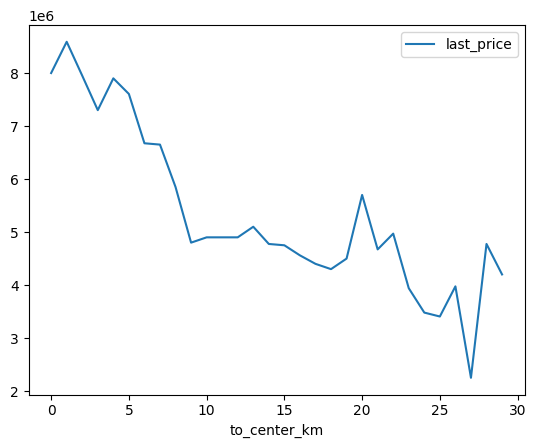

In [189]:
price_per_km.groupby('to_center_km').median().plot();

**We see that the cost falls as you move away from the city center. However, at a distance of 5 km from the center there is a sharp surge in value, which perhaps corresponds to some expensive area of ​​St. Petersburg, for example, the Petrogradsky district. As you move away from the center of St. Petersburg, the cost drops, but at 20 km from the center and at 27 km there are huge spikes, which probably correspond to some elite suburban areas of St. Petersburg, where cottages/townhouses, etc. are located**

### General conclusion

**The data was uploaded on May 3, 2019, so for some of the data there is no information about the date the ad was removed, some of the ads remained active at the time of upload, and their sales price could eventually be adjusted relative to the original information in the dataframe.**

**Sale usually takes 95 days**

**Ads with 1 and 2 rooms predominate (almost the same number)**

**By the type of floor, the value “other” greatly prevails; the last floor is in 2nd place in terms of prevalence, however, the number of advertisements with the first and last floor is quite close to the total number of advertisements.**

**On weekends there is a decline in the number of posted advertisements, and from Monday their number increases, with the highest values occurring on Tuesday and Thursday.**

**The decline in advertisement placement occurs in January, May and December, which is logical due to long public holidays in the Russian Federation during these months. After January, the number of advertisements increases sharply, then a gradual decline until March and a sharp decline in April, after April there is a gradual increase until November.**

**The highest median cost is typical for Tuesday, after which it declines until Sunday.**

**April is on average the most expensive property prices, June is the cheapest.**

**In 2014, the median cost of an object was significantly higher than other years, then there was a decline in value before 2017 and after 2017 there was a slight increase.**

**The dependence of the cost is strongest on the total area of the object and on the locality.**

**The most expensive cost per square meter is in St. Petersburg, the cheapest of the top 10 by number of advertisements is in Vyborg, the difference is almost 2 times.**

**Inside St. Petersburg, the cost falls as you move away from the city center. However, at a distance of 5 km from the center there is a sharp surge in value, which perhaps corresponds to some expensive area of ​​St. Petersburg, for example, the Petrogradsky district. As you move away from the center of St. Petersburg, the cost drops, but at 20 km from the center and at 27 km there are huge spikes, which probably correspond to some elite suburban areas of St. Petersburg, where cottages/townhouses, etc. are located**